In [16]:
import yfinance as yf
import numpy as np
from numpy import cumsum
import pandas as pd
import ssl
import pandas_datareader.data as rd
from dateutil.relativedelta import relativedelta
import datetime as dt
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm


In [17]:

ssl._create_default_https_context = ssl._create_unverified_context

# LARGE CAP STOCKS

# import the list of S&P 500 companies
table = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
# print(table)

# get the list of tickers
tickers = table.Symbol.tolist()

# print the tickers
# print(tickers)


start = dt.datetime(1999, 1, 1)
end = dt.datetime(2023, 1, 31)

# Download data
data = yf.download(tickers, start=start, end=end)['Adj Close']

# print data
# print(data)

# remove the tickers where data is missing
data = data.dropna(axis=1, how='any')
# print(data)

# convert data into a dataframe with a DatetimeIndex
df = pd.DataFrame(data)
df.index = pd.to_datetime(df.index)

nr_of_stocks = 3
month = 12
day = 31

print('nr_of_stocks =', nr_of_stocks)
# calculate monthly returns for the tickers that have data for the entire period (2000-2021)
df_mtl_ret = df.pct_change().resample('M').agg(lambda x: (x + 1).prod() - 1)

# print the monthly returns
print(df_mtl_ret)

# calculate cummulative returns over the past 1, 3, 6, 9 and 12 months
df_mtl_ret_1 = (df_mtl_ret+1).rolling(1).apply(np.prod) - 1
#df_mtl_ret_3 = (df_mtl_ret+1).rolling(3).apply(np.prod) - 1
#df_mtl_ret_6 = (df_mtl_ret+1).rolling(6).apply(np.prod) - 1
#df_mtl_ret_9 = (df_mtl_ret+1).rolling(9).apply(np.prod) - 1
#df_mtl_ret_12 = (df_mtl_ret+1).rolling(12).apply(np.prod) - 1

# print(df_mtl_ret_3)

# print the cummulative returns
# print(df_mtl_ret_3)
# print(df_mtl_ret_6)
# print(df_mtl_ret_9)
# print(df_mtl_ret_12)

# Winners from the past 3 months

# define different periods for the formation period (2000-2022) with loop where name of the variable is the year
for i in range(1999, 2022):
    globals()['formation_{}'.format(i-1999)] = dt.datetime(i, month, day)
    globals()['past_3_{}'.format(i-1999)] = df_mtl_ret_1.loc[globals()['formation_{}'.format(i-1999)]].reset_index()
    # print(globals()['past_3_{}'.format(i-1999)])
for i in range(1, 23):
    # col = globals()['past_3_{}'.format(i)].iloc[:, 1].drop_duplicates()
    # globals()['past_3_{}'.format(i)]['quintile'] = pd.qcut(col, 5, labels=False)
    # print(globals()['past_3_{}'.format(i)])
    globals()['past_3_{}'.format(i)]['quintile'] = pd.qcut(globals()['past_3_{}'.format(i)].iloc[:, 1], 5, labels=False)
    #print(globals()['past_3_{}'.format(i)])

for i in range(1, 23):
    globals()['winners_3_{}'.format(i)] = globals()['past_3_{}'.format(i)][globals()['past_3_{}'.format(i)]['quintile'] == 4].nlargest(nr_of_stocks, globals()['formation_{}'.format(i)])
    # For print af winners
    print('winners large')
    print(globals()['winners_3_{}'.format(i)])

for i in range(1, 23):
    globals()['winners_return_jan_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=1), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_feb_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=2), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_mar_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=3), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_apr_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=4), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_may_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=5), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_jun_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=6), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_jul_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=7), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_aug_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=8), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_sep_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=9), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_oct_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=10), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_nov_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=11), globals()['winners_3_{}'.format(i)]['index']]
    globals()['winners_return_dec_3_{}'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=12), globals()['winners_3_{}'.format(i)]['index']]

    globals()['win_mean_jan_{}_3'.format(i)] = globals()['winners_return_jan_3_{}'.format(i)].mean()
    globals()['win_mean_feb_{}_3'.format(i)] = globals()['winners_return_feb_3_{}'.format(i)].mean()
    globals()['win_mean_mar_{}_3'.format(i)] = globals()['winners_return_mar_3_{}'.format(i)].mean()
    globals()['win_mean_apr_{}_3'.format(i)] = globals()['winners_return_apr_3_{}'.format(i)].mean()
    globals()['win_mean_may_{}_3'.format(i)] = globals()['winners_return_may_3_{}'.format(i)].mean()
    globals()['win_mean_jun_{}_3'.format(i)] = globals()['winners_return_jun_3_{}'.format(i)].mean()
    globals()['win_mean_jul_{}_3'.format(i)] = globals()['winners_return_jul_3_{}'.format(i)].mean()
    globals()['win_mean_aug_{}_3'.format(i)] = globals()['winners_return_aug_3_{}'.format(i)].mean()
    globals()['win_mean_sep_{}_3'.format(i)] = globals()['winners_return_sep_3_{}'.format(i)].mean()
    globals()['win_mean_oct_{}_3'.format(i)] = globals()['winners_return_oct_3_{}'.format(i)].mean()
    globals()['win_mean_nov_{}_3'.format(i)] = globals()['winners_return_nov_3_{}'.format(i)].mean()
    globals()['win_mean_dec_{}_3'.format(i)] = globals()['winners_return_dec_3_{}'.format(i)].mean()

    globals()['win_cumulative_return_1mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) - 1
    globals()['mean_return_1_{}'.format(i)] = globals()['win_cumulative_return_1mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_2mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) - 1
    globals()['mean_return_2_{}'.format(i)] = globals()['win_cumulative_return_2mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_3mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) - 1
    globals()['mean_return_3_{}'.format(i)] = globals()['win_cumulative_return_3mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_4mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) * (1 + globals()['winners_return_apr_3_{}'.format(i)]) - 1
    globals()['mean_return_4_{}'.format(i)] = globals()['win_cumulative_return_4mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_5mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) * (1 + globals()['winners_return_apr_3_{}'.format(i)]) * (1 + globals()['winners_return_may_3_{}'.format(i)]) - 1
    globals()['mean_return_5_{}'.format(i)] = globals()['win_cumulative_return_5mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_6mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) * (1 + globals()['winners_return_apr_3_{}'.format(i)]) * (1 + globals()['winners_return_may_3_{}'.format(i)]) * (1 + globals()['winners_return_jun_3_{}'.format(i)]) - 1
    globals()['mean_return_6_{}'.format(i)] = globals()['win_cumulative_return_6mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_7mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) * (1 + globals()['winners_return_apr_3_{}'.format(i)]) * (1 + globals()['winners_return_may_3_{}'.format(i)]) * (1 + globals()['winners_return_jun_3_{}'.format(i)]) * (1 + globals()['winners_return_jul_3_{}'.format(i)]) - 1
    globals()['mean_return_7_{}'.format(i)] = globals()['win_cumulative_return_7mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_8mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) * (1 + globals()['winners_return_apr_3_{}'.format(i)]) * (1 + globals()['winners_return_may_3_{}'.format(i)]) * (1 + globals()['winners_return_jun_3_{}'.format(i)]) * (1 + globals()['winners_return_jul_3_{}'.format(i)]) * (1 + globals()['winners_return_aug_3_{}'.format(i)]) - 1
    globals()['mean_return_8_{}'.format(i)] = globals()['win_cumulative_return_8mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_9mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) * (1 + globals()['winners_return_apr_3_{}'.format(i)]) * (1 + globals()['winners_return_may_3_{}'.format(i)]) * (1 + globals()['winners_return_jun_3_{}'.format(i)]) * (1 + globals()['winners_return_jul_3_{}'.format(i)]) * (1 + globals()['winners_return_aug_3_{}'.format(i)]) * (1 + globals()['winners_return_sep_3_{}'.format(i)]) - 1
    globals()['mean_return_9_{}'.format(i)] = globals()['win_cumulative_return_9mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_10mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) * (1 + globals()['winners_return_apr_3_{}'.format(i)]) * (1 + globals()['winners_return_may_3_{}'.format(i)]) * (1 + globals()['winners_return_jun_3_{}'.format(i)]) * (1 + globals()['winners_return_jul_3_{}'.format(i)]) * (1 + globals()['winners_return_aug_3_{}'.format(i)]) * (1 + globals()['winners_return_sep_3_{}'.format(i)]) * (1 + globals()['winners_return_oct_3_{}'.format(i)]) - 1
    globals()['mean_return_10_{}'.format(i)] = globals()['win_cumulative_return_10mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_11mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) * (1 + globals()['winners_return_apr_3_{}'.format(i)]) * (1 + globals()['winners_return_may_3_{}'.format(i)]) * (1 + globals()['winners_return_jun_3_{}'.format(i)]) * (1 + globals()['winners_return_jul_3_{}'.format(i)]) * (1 + globals()['winners_return_aug_3_{}'.format(i)]) * (1 + globals()['winners_return_sep_3_{}'.format(i)]) * (1 + globals()['winners_return_oct_3_{}'.format(i)]) * (1 + globals()['winners_return_nov_3_{}'.format(i)]) - 1
    globals()['mean_return_11_{}'.format(i)] = globals()['win_cumulative_return_11mth_{}'.format(i)].mean()
    globals()['win_cumulative_return_12mth_{}'.format(i)] = (1 + globals()['winners_return_jan_3_{}'.format(i)]) * (1 + globals()['winners_return_feb_3_{}'.format(i)]) * (1 + globals()['winners_return_mar_3_{}'.format(i)]) * (1 + globals()['winners_return_apr_3_{}'.format(i)]) * (1 + globals()['winners_return_may_3_{}'.format(i)]) * (1 + globals()['winners_return_jun_3_{}'.format(i)]) * (1 + globals()['winners_return_jul_3_{}'.format(i)]) * (1 + globals()['winners_return_aug_3_{}'.format(i)]) * (1 + globals()['winners_return_sep_3_{}'.format(i)]) * (1 + globals()['winners_return_oct_3_{}'.format(i)]) * (1 + globals()['winners_return_nov_3_{}'.format(i)]) * (1 + globals()['winners_return_dec_3_{}'.format(i)]) - 1
    globals()['mean_return_12_{}'.format(i)] = globals()['win_cumulative_return_12mth_{}'.format(i)].mean()

Winners_cumulative = pd.DataFrame(columns=['1 month', '3 month', '6 month', '9 month', '12 month'])
for i in range(1, 23):
    Winners_cumulative.loc[globals()['formation_{}'.format(i)]] = [globals()['mean_return_1_{}'.format(i)], globals()['mean_return_3_{}'.format(i)], globals()['mean_return_6_{}'.format(i)], globals()['mean_return_9_{}'.format(i)], globals()['mean_return_12_{}'.format(i)]]

# Calcualte the mean return for the winners over the whole period with different holding periods (1, 3, 6, 9, 12 months)
Winners_cumulative_mean_1 = Winners_cumulative['1 month'].mean()
Winners_cumulative_mean_3 = Winners_cumulative['3 month'].mean()
Winners_cumulative_mean_6 = Winners_cumulative['6 month'].mean()
Winners_cumulative_mean_9 = Winners_cumulative['9 month'].mean()
Winners_cumulative_mean_12 = Winners_cumulative['12 month'].mean()

# Calculate the mean return for winners in each month
winner_monthly_mean = pd.DataFrame(columns=['1 month', '2 month', '3 month', '4 month', '5 month', '6 month', '7 month', '8 month', '9 month', '10 month', '11 month', '12 month'])
for i in range(1,23):
    winner_monthly_mean.loc[globals()['formation_{}'.format(i)]] = [globals()['win_mean_jan_{}_3'.format(i)], globals()['win_mean_feb_{}_3'.format(i)], globals()['win_mean_mar_{}_3'.format(i)], globals()['win_mean_apr_{}_3'.format(i)], globals()['win_mean_may_{}_3'.format(i)], globals()['win_mean_jun_{}_3'.format(i)], globals()['win_mean_jul_{}_3'.format(i)], globals()['win_mean_aug_{}_3'.format(i)], globals()['win_mean_sep_{}_3'.format(i)], globals()['win_mean_oct_{}_3'.format(i)], globals()['win_mean_nov_{}_3'.format(i)], globals()['win_mean_dec_{}_3'.format(i)]]


# LOOPING THROUGH THE 22 YEARS TO CALCULATE THE MEAN RETURNS FOR THE LOSERS

# define different periods for the formation period (2000-2021) with loop where name of the variable is the year
for i in range(1999, 2022):
    globals()['formation_{}'.format(i-1999)] = dt.datetime(i, month, day)
    globals()['past_3_{}'.format(i-1999)] = df_mtl_ret_1.loc[globals()['formation_{}'.format(i-1999)]].reset_index()
    # print(globals()['past_3_{}'.format(i-1999)])

for i in range(1, 23):
    #col = globals()['past_3_{}'.format(i)].iloc[:, 1].drop_duplicates()
    #globals()['past_3_{}'.format(i)]['quintile'] = pd.qcut(col, 5, labels=False)
    # print(globals()['past_3_{}'.format(i)])
    globals()['past_3_{}'.format(i)]['quintile'] = pd.qcut(globals()['past_3_{}'.format(i)].iloc[:, 1], 5, labels=False)
    # print(globals()['past_3_{}'.format(i)])

for i in range(1, 23):
    globals()['losers_3_{}'.format(i)] = globals()['past_3_{}'.format(i)][globals()['past_3_{}'.format(i)]['quintile'] == 0].nsmallest(nr_of_stocks, globals()['formation_{}'.format(i)])
    # print a losers
    print('losers large')
    print(globals()['losers_3_{}'.format(i)])

for i in range(1, 23):
    globals()['losers_return_jan_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=1), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_feb_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=2), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_marts_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=3), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_ap_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=4), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_may_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=5), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_june_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=6), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_july_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=7), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_aug_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=8), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_sept_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=9), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_oct_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=10), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_nov_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=11), globals()['losers_3_{}'.format(i)]['index']]
    globals()['losers_return_dec_{}_3'.format(i)] = df_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=12), globals()['losers_3_{}'.format(i)]['index']]

    globals()['loser_mean_jan_{}_3'.format(i)] = globals()['losers_return_jan_{}_3'.format(i)].mean()
    globals()['loser_mean_feb_{}_3'.format(i)] = globals()['losers_return_feb_{}_3'.format(i)].mean()
    globals()['loser_mean_marts_{}_3'.format(i)] = globals()['losers_return_marts_{}_3'.format(i)].mean()
    globals()['loser_mean_ap_{}_3'.format(i)] = globals()['losers_return_ap_{}_3'.format(i)].mean()
    globals()['loser_mean_may_{}_3'.format(i)] = globals()['losers_return_may_{}_3'.format(i)].mean()
    globals()['loser_mean_june_{}_3'.format(i)] = globals()['losers_return_june_{}_3'.format(i)].mean()
    globals()['loser_mean_july_{}_3'.format(i)] = globals()['losers_return_july_{}_3'.format(i)].mean()
    globals()['loser_mean_aug_{}_3'.format(i)] = globals()['losers_return_aug_{}_3'.format(i)].mean()
    globals()['loser_mean_sept_{}_3'.format(i)] = globals()['losers_return_sept_{}_3'.format(i)].mean()
    globals()['loser_mean_oct_{}_3'.format(i)] = globals()['losers_return_oct_{}_3'.format(i)].mean()
    globals()['loser_mean_nov_{}_3'.format(i)] = globals()['losers_return_nov_{}_3'.format(i)].mean()
    globals()['loser_mean_dec_{}_3'.format(i)] = globals()['losers_return_dec_{}_3'.format(i)].mean()

    globals()['loser_cumulative_return_1mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) - 1
    globals()['mean_return_1_{}'.format(i)] = globals()['loser_cumulative_return_1mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_2mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) - 1
    globals()['mean_return_2_{}'.format(i)] = globals()['loser_cumulative_return_2mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_3mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) - 1
    globals()['mean_return_3_{}'.format(i)] = globals()['loser_cumulative_return_3mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_4mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) * (1 + globals()['losers_return_ap_{}_3'.format(i)]) - 1
    globals()['mean_return_4_{}'.format(i)] = globals()['loser_cumulative_return_4mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_5mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) * (1 + globals()['losers_return_ap_{}_3'.format(i)]) * (1 + globals()['losers_return_may_{}_3'.format(i)]) - 1
    globals()['mean_return_5_{}'.format(i)] = globals()['loser_cumulative_return_5mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_6mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) * (1 + globals()['losers_return_ap_{}_3'.format(i)]) * (1 + globals()['losers_return_may_{}_3'.format(i)]) * (1 + globals()['losers_return_june_{}_3'.format(i)]) - 1
    globals()['mean_return_6_{}'.format(i)] = globals()['loser_cumulative_return_6mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_7mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) * (1 + globals()['losers_return_ap_{}_3'.format(i)]) * (1 + globals()['losers_return_may_{}_3'.format(i)]) * (1 + globals()['losers_return_june_{}_3'.format(i)]) * (1 + globals()['losers_return_july_{}_3'.format(i)]) - 1
    globals()['mean_return_7_{}'.format(i)] = globals()['loser_cumulative_return_7mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_8mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) * (1 + globals()['losers_return_ap_{}_3'.format(i)]) * (1 + globals()['losers_return_may_{}_3'.format(i)]) * (1 + globals()['losers_return_june_{}_3'.format(i)]) * (1 + globals()['losers_return_july_{}_3'.format(i)]) * (1 + globals()['losers_return_aug_{}_3'.format(i)]) - 1
    globals()['mean_return_8_{}'.format(i)] = globals()['loser_cumulative_return_8mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_9mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) * (1 + globals()['losers_return_ap_{}_3'.format(i)]) * (1 + globals()['losers_return_may_{}_3'.format(i)]) * (1 + globals()['losers_return_june_{}_3'.format(i)]) * (1 + globals()['losers_return_july_{}_3'.format(i)]) * (1 + globals()['losers_return_aug_{}_3'.format(i)]) * (1 + globals()['losers_return_sept_{}_3'.format(i)]) - 1
    globals()['mean_return_9_{}'.format(i)] = globals()['loser_cumulative_return_9mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_10mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) * (1 + globals()['losers_return_ap_{}_3'.format(i)]) * (1 + globals()['losers_return_may_{}_3'.format(i)]) * (1 + globals()['losers_return_june_{}_3'.format(i)]) * (1 + globals()['losers_return_july_{}_3'.format(i)]) * (1 + globals()['losers_return_aug_{}_3'.format(i)]) * (1 + globals()['losers_return_sept_{}_3'.format(i)]) * (1 + globals()['losers_return_oct_{}_3'.format(i)]) - 1
    globals()['mean_return_10_{}'.format(i)] = globals()['loser_cumulative_return_10mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_11mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) * (1 + globals()['losers_return_ap_{}_3'.format(i)]) * (1 + globals()['losers_return_may_{}_3'.format(i)]) * (1 + globals()['losers_return_june_{}_3'.format(i)]) * (1 + globals()['losers_return_july_{}_3'.format(i)]) * (1 + globals()['losers_return_aug_{}_3'.format(i)]) * (1 + globals()['losers_return_sept_{}_3'.format(i)]) * (1 + globals()['losers_return_oct_{}_3'.format(i)]) * (1 + globals()['losers_return_nov_{}_3'.format(i)]) - 1
    globals()['mean_return_11_{}'.format(i)] = globals()['loser_cumulative_return_11mth_{}'.format(i)].mean()
    globals()['loser_cumulative_return_12mth_{}'.format(i)] = (1 + globals()['losers_return_jan_{}_3'.format(i)]) * (1 + globals()['losers_return_feb_{}_3'.format(i)]) * (1 + globals()['losers_return_marts_{}_3'.format(i)]) * (1 + globals()['losers_return_ap_{}_3'.format(i)]) * (1 + globals()['losers_return_may_{}_3'.format(i)]) * (1 + globals()['losers_return_june_{}_3'.format(i)]) * (1 + globals()['losers_return_july_{}_3'.format(i)]) * (1 + globals()['losers_return_aug_{}_3'.format(i)]) * (1 + globals()['losers_return_sept_{}_3'.format(i)]) * (1 + globals()['losers_return_oct_{}_3'.format(i)]) * (1 + globals()['losers_return_nov_{}_3'.format(i)]) * (1 + globals()['losers_return_dec_{}_3'.format(i)]) - 1
    globals()['mean_return_12_{}'.format(i)] = globals()['loser_cumulative_return_12mth_{}'.format(i)].mean()

# Calculate losers cumulative return for (1 month, 3 month, 6 month, 9 month, 12 month)
Losers_cumulative = pd.DataFrame(columns=['1 month', '3 month', '6 month', '9 month', '12 month'])
for i in range(1,23):
    Losers_cumulative.loc[globals()['formation_{}'.format(i)]] = [globals()['mean_return_1_{}'.format(i)], globals()['mean_return_3_{}'.format(i)], globals()['mean_return_6_{}'.format(i)], globals()['mean_return_9_{}'.format(i)], globals()['mean_return_12_{}'.format(i)]]

# Calcualte the mean return for the winners over the whole period with different holding periods (1, 3, 6, 9, 12 months)
Loser_cumulative_mean_1 = Losers_cumulative['1 month'].mean()
Loser_cumulative_mean_3 = Losers_cumulative['3 month'].mean()
Loser_cumulative_mean_6 = Losers_cumulative['6 month'].mean()
Loser_cumulative_mean_9 = Losers_cumulative['9 month'].mean()
Loser_cumulative_mean_12 = Losers_cumulative['12 month'].mean()

# Setting up a Dataframe with the mean return for each month in
loser_monthly_mean = pd.DataFrame(columns=['1 month', '2 month', '3 month', '4 month', '5 month', '6 month', '7 month', '8 month', '9 month', '10 month', '11 month', '12 month'])
for i in range(1, 23):
    loser_monthly_mean.loc[globals()['formation_{}'.format(i)]] = [globals()['loser_mean_jan_{}_3'.format(i)], globals()['loser_mean_feb_{}_3'.format(i)], globals()['loser_mean_marts_{}_3'.format(i)], globals()['loser_mean_ap_{}_3'.format(i)], globals()['loser_mean_may_{}_3'.format(i)], globals()['loser_mean_june_{}_3'.format(i)], globals()['loser_mean_july_{}_3'.format(i)], globals()['loser_mean_aug_{}_3'.format(i)], globals()['loser_mean_sept_{}_3'.format(i)], globals()['loser_mean_oct_{}_3'.format(i)], globals()['loser_mean_nov_{}_3'.format(i)], globals()['loser_mean_dec_{}_3'.format(i)]]

# now download S&P 500 data from yahoo finance and find the cumulative return of the S&P 500 for each period and year and plot it

#download the S&P 500 data from yahoo finance
df_sp500 = yf.download('^GSPC', start=start, end=end)

# find the monthly return of the S&P 500
sp500_mtl_ret =df_sp500.pct_change().resample('M').agg(lambda x: (x + 1).prod() - 1)

for i in range(1999, 2022):
    globals()['formation_{}'.format(i-1999)] = dt.datetime(i, month, day)

# find th cumulative return of the S&P 500 for each period and year
for i in range(1, 23):
    globals()['sp500_return_jan_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)]+ relativedelta(months=1), 'Adj Close']
    globals()['sp500_return_feb_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=2), 'Adj Close']
    globals()['sp500_return_marts_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=3), 'Adj Close']
    globals()['sp500_return_ap_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=4), 'Adj Close']
    globals()['sp500_return_may_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=5), 'Adj Close']
    globals()['sp500_return_june_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=6), 'Adj Close']
    globals()['sp500_return_july_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=7), 'Adj Close']
    globals()['sp500_return_aug_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=8), 'Adj Close']
    globals()['sp500_return_sept_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=9), 'Adj Close']
    globals()['sp500_return_oct_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=10), 'Adj Close']
    globals()['sp500_return_nov_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=11), 'Adj Close']
    globals()['sp500_return_dec_{}'.format(i)] = sp500_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=12), 'Adj Close']

    globals()['sp500_mean_jan_{}'.format(i)] = globals()['sp500_return_jan_{}'.format(i)].mean()
    globals()['sp500_mean_feb_{}'.format(i)] = globals()['sp500_return_feb_{}'.format(i)].mean()
    globals()['sp500_mean_marts_{}'.format(i)] = globals()['sp500_return_marts_{}'.format(i)].mean()
    globals()['sp500_mean_ap_{}'.format(i)] = globals()['sp500_return_ap_{}'.format(i)].mean()
    globals()['sp500_mean_may_{}'.format(i)] = globals()['sp500_return_may_{}'.format(i)].mean()
    globals()['sp500_mean_june_{}'.format(i)] = globals()['sp500_return_june_{}'.format(i)].mean()
    globals()['sp500_mean_july_{}'.format(i)] = globals()['sp500_return_july_{}'.format(i)].mean()
    globals()['sp500_mean_aug_{}'.format(i)] = globals()['sp500_return_aug_{}'.format(i)].mean()
    globals()['sp500_mean_sept_{}'.format(i)] = globals()['sp500_return_sept_{}'.format(i)].mean()
    globals()['sp500_mean_oct_{}'.format(i)] = globals()['sp500_return_oct_{}'.format(i)].mean()
    globals()['sp500_mean_nov_{}'.format(i)] = globals()['sp500_return_nov_{}'.format(i)].mean()
    globals()['sp500_mean_dec_{}'.format(i)] = globals()['sp500_return_dec_{}'.format(i)].mean()

    globals()['sp500_cumulative_return_1mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_2mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_3mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_4mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) * (1 + globals()['sp500_return_ap_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_5mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) * (1 + globals()['sp500_return_ap_{}'.format(i)]) * (1 + globals()['sp500_return_may_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_6mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) * (1 + globals()['sp500_return_ap_{}'.format(i)]) * (1 + globals()['sp500_return_may_{}'.format(i)]) * (1 + globals()['sp500_return_june_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_7mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) * (1 + globals()['sp500_return_ap_{}'.format(i)]) * (1 + globals()['sp500_return_may_{}'.format(i)]) * (1 + globals()['sp500_return_june_{}'.format(i)]) * (1 + globals()['sp500_return_july_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_8mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) * (1 + globals()['sp500_return_ap_{}'.format(i)]) * (1 + globals()['sp500_return_may_{}'.format(i)]) * (1 + globals()['sp500_return_june_{}'.format(i)]) * (1 + globals()['sp500_return_july_{}'.format(i)]) * (1 + globals()['sp500_return_aug_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_9mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) * (1 + globals()['sp500_return_ap_{}'.format(i)]) * (1 + globals()['sp500_return_may_{}'.format(i)]) * (1 + globals()['sp500_return_june_{}'.format(i)]) * (1 + globals()['sp500_return_july_{}'.format(i)]) * (1 + globals()['sp500_return_aug_{}'.format(i)]) * (1 + globals()['sp500_return_sept_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_10mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) * (1 + globals()['sp500_return_ap_{}'.format(i)]) * (1 + globals()['sp500_return_may_{}'.format(i)]) * (1 + globals()['sp500_return_june_{}'.format(i)]) * (1 + globals()['sp500_return_july_{}'.format(i)]) * (1 + globals()['sp500_return_aug_{}'.format(i)]) * (1 + globals()['sp500_return_sept_{}'.format(i)]) * (1 + globals()['sp500_return_oct_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_11mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) * (1 + globals()['sp500_return_ap_{}'.format(i)]) * (1 + globals()['sp500_return_may_{}'.format(i)]) * (1 + globals()['sp500_return_june_{}'.format(i)]) * (1 + globals()['sp500_return_july_{}'.format(i)]) * (1 + globals()['sp500_return_aug_{}'.format(i)]) * (1 + globals()['sp500_return_sept_{}'.format(i)]) * (1 + globals()['sp500_return_oct_{}'.format(i)]) * (1 + globals()['sp500_return_nov_{}'.format(i)]) - 1
    globals()['sp500_cumulative_return_12mth_{}'.format(i)] = (1 + globals()['sp500_return_jan_{}'.format(i)]) * (1 + globals()['sp500_return_feb_{}'.format(i)]) * (1 + globals()['sp500_return_marts_{}'.format(i)]) * (1 + globals()['sp500_return_ap_{}'.format(i)]) * (1 + globals()['sp500_return_may_{}'.format(i)]) * (1 + globals()['sp500_return_june_{}'.format(i)]) * (1 + globals()['sp500_return_july_{}'.format(i)]) * (1 + globals()['sp500_return_aug_{}'.format(i)]) * (1 + globals()['sp500_return_sept_{}'.format(i)]) * (1 + globals()['sp500_return_oct_{}'.format(i)]) * (1 + globals()['sp500_return_nov_{}'.format(i)]) * (1 + globals()['sp500_return_dec_{}'.format(i)]) - 1

SP500_cumulative = pd.DataFrame(columns=['1 month','3 month','6 month','9 month','12 month'])
for i in range(1, 23):
    SP500_cumulative.loc[globals()['formation_{}'.format(i)]] = [globals()['sp500_cumulative_return_1mth_{}'.format(i)], globals()['sp500_cumulative_return_3mth_{}'.format(i)], globals()['sp500_cumulative_return_6mth_{}'.format(i)], globals()['sp500_cumulative_return_9mth_{}'.format(i)], globals()['sp500_cumulative_return_12mth_{}'.format(i)]]

SP500_monthly = pd.DataFrame(columns=['1 month', '2 month', '3 month', '4 month', '5 month', '6 month', '7 month', '8 month', '9 month', '10 month', '11 month', '12 month'])
for i in range(1, 23):
    SP500_monthly.loc[globals()['formation_{}'.format(i)]] = [globals()['sp500_mean_jan_{}'.format(i)], globals()['sp500_mean_feb_{}'.format(i)], globals()['sp500_mean_marts_{}'.format(i)], globals()['sp500_mean_ap_{}'.format(i)], globals()['sp500_mean_may_{}'.format(i)], globals()['sp500_mean_june_{}'.format(i)], globals()['sp500_mean_july_{}'.format(i)], globals()['sp500_mean_aug_{}'.format(i)], globals()['sp500_mean_sept_{}'.format(i)], globals()['sp500_mean_oct_{}'.format(i)], globals()['sp500_mean_nov_{}'.format(i)], globals()['sp500_mean_dec_{}'.format(i)]]
print('SP500_cumulative')
print(SP500_cumulative)

Momentum_Strategy_Monthly_Large = (winner_monthly_mean - loser_monthly_mean) / 2
Momentum_Strategy_Cum_Large = (Winners_cumulative - Losers_cumulative) / 2
print('Momentum_Strategy_Cum_Large')
print(Momentum_Strategy_Cum_Large)
Contrarian_Strategy_Monthly_Large = (loser_monthly_mean - winner_monthly_mean) / 2
Contrarian_Strategy_Cum_Large = (Losers_cumulative - Winners_cumulative) / 2
print('Contrarian_Strategy_Cum_Large')
print(Contrarian_Strategy_Cum_Large)


# Strategies against the market (S&P500)
Momentum_Strategy_Monthly_Large_vs_SP500 = Momentum_Strategy_Monthly_Large - SP500_monthly
Momentum_Strategy_Cum_Large_vs_SP500 = Momentum_Strategy_Cum_Large - SP500_cumulative
Contrarian_Strategy_Monthly_Large_vs_SP500 = Contrarian_Strategy_Monthly_Large - SP500_monthly
Contrarian_Strategy_Cum_Large_vs_SP500 = Contrarian_Strategy_Cum_Large - SP500_cumulative



# Calculate the T-test for the strategies against the market
print('# Calculate the T-test for the strategies against the marketMOMENTUMLARGECAP')
Momentum_Strategy_Cum_Large_vs_SP500['t-test 1 month'] = Momentum_Strategy_Cum_Large_vs_SP500['1 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Large_vs_SP500['1 month'], x)[0])
Momentum_Strategy_Cum_Large_vs_SP500['t-test 3 month'] = Momentum_Strategy_Cum_Large_vs_SP500['3 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Large_vs_SP500['3 month'], x)[0])
Momentum_Strategy_Cum_Large_vs_SP500['t-test 6 month'] = Momentum_Strategy_Cum_Large_vs_SP500['6 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Large_vs_SP500['6 month'], x)[0])
Momentum_Strategy_Cum_Large_vs_SP500['t-test 9 month'] = Momentum_Strategy_Cum_Large_vs_SP500['9 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Large_vs_SP500['9 month'], x)[0])
Momentum_Strategy_Cum_Large_vs_SP500['t-test 12 month'] = Momentum_Strategy_Cum_Large_vs_SP500['12 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Large_vs_SP500['12 month'], x)[0])

Contrarian_Strategy_Cum_Large_vs_SP500['t-test 1 month'] = Contrarian_Strategy_Cum_Large_vs_SP500['1 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Large_vs_SP500['1 month'], x)[0])
Contrarian_Strategy_Cum_Large_vs_SP500['t-test 3 month'] = Contrarian_Strategy_Cum_Large_vs_SP500['3 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Large_vs_SP500['3 month'], x)[0])
Contrarian_Strategy_Cum_Large_vs_SP500['t-test 6 month'] = Contrarian_Strategy_Cum_Large_vs_SP500['6 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Large_vs_SP500['6 month'], x)[0])
Contrarian_Strategy_Cum_Large_vs_SP500['t-test 9 month'] = Contrarian_Strategy_Cum_Large_vs_SP500['9 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Large_vs_SP500['9 month'], x)[0])
Contrarian_Strategy_Cum_Large_vs_SP500['t-test 12 month'] = Contrarian_Strategy_Cum_Large_vs_SP500['12 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Large_vs_SP500['12 month'], x)[0])

# Print the t-test results and cumaltive mean returns
print('Momentum_Straty_cum_large_vs_market')
for index, row in Momentum_Strategy_Cum_Large_vs_SP500.iterrows():
    print(f'{index}: {row["1 month"]:.3f} ({row["t-test 1 month"]:.3f}), {row["3 month"]:.3f} ({row["t-test 3 month"]:.3f}), {row["6 month"]:.3f} ({row["t-test 6 month"]:.3f}), {row["9 month"]:.3f} ({row["t-test 9 month"]:.3f}), {row["12 month"]:.3f} ({row["t-test 12 month"]:.3f})')
print('Contrarian_Straty_cum_large_vs_market')
for index, row in Contrarian_Strategy_Cum_Large_vs_SP500.iterrows():
    print(f'{index}: {row["1 month"]:.3f} ({row["t-test 1 month"]:.3f}), {row["3 month"]:.3f} ({row["t-test 3 month"]:.3f}), {row["6 month"]:.3f} ({row["t-test 6 month"]:.3f}), {row["9 month"]:.3f} ({row["t-test 9 month"]:.3f}), {row["12 month"]:.3f} ({row["t-test 12 month"]:.3f})')

Momentum_overperformance_large_mean_1 = Momentum_Strategy_Cum_Large_vs_SP500['1 month'].mean()
Momentum_overperformance_large_mean_3 = Momentum_Strategy_Cum_Large_vs_SP500['3 month'].mean()
Momentum_overperformance_large_mean_6 = Momentum_Strategy_Cum_Large_vs_SP500['6 month'].mean()
Momentum_overperformance_large_mean_9 = Momentum_Strategy_Cum_Large_vs_SP500['9 month'].mean()
Momentum_overperformance_large_mean_12 = Momentum_Strategy_Cum_Large_vs_SP500['12 month'].mean()

Contrarian_overperformance_large_mean_1 = Contrarian_Strategy_Cum_Large_vs_SP500['1 month'].mean()
Contrarian_overperformance_large_mean_3 = Contrarian_Strategy_Cum_Large_vs_SP500['3 month'].mean()
Contrarian_overperformance_large_mean_6 = Contrarian_Strategy_Cum_Large_vs_SP500['6 month'].mean()
Contrarian_overperformance_large_mean_9 = Contrarian_Strategy_Cum_Large_vs_SP500['9 month'].mean()
Contrarian_overperformance_large_mean_12 = Contrarian_Strategy_Cum_Large_vs_SP500['12 month'].mean()

print(f'Momentum overperformance Largecap mean 1 month: {Momentum_overperformance_large_mean_1:.3f}')
print(f'Momentum overperformance Largecap mean 3 month: {Momentum_overperformance_large_mean_3:.3f}')
print(f'Momentum overperformance Largecap mean 6 month: {Momentum_overperformance_large_mean_6:.3f}')
print(f'Momentum overperformance Largecap mean 9 month: {Momentum_overperformance_large_mean_9:.3f}')
print(f'Momentum overperformance Largecap mean 12 month: {Momentum_overperformance_large_mean_12:.3f}')

print(f'Contrarian overperformance Largecap mean 1 month: {Contrarian_overperformance_large_mean_1:.3f}')
print(f'Contrarian overperformance Largecap mean 3 month: {Contrarian_overperformance_large_mean_3:.3f}')
print(f'Contrarian overperformance Largecap mean 6 month: {Contrarian_overperformance_large_mean_6:.3f}')
print(f'Contrarian overperformance Largecap mean 9 month: {Contrarian_overperformance_large_mean_9:.3f}')
print(f'Contrarian overperformance Largecap mean 12 month: {Contrarian_overperformance_large_mean_12:.3f}')







[*********************100%***********************]  503 of 503 completed

2 Failed downloads:
- BRK.B: No timezone found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
nr_of_stocks = 3
                AAPL       ABC       ABT      ACGL      ADBE       ADI   
Date                                                                     
1999-01-31 -0.001515  0.082025 -0.044357 -0.083159 -0.043805 -0.012448  \
1999-02-28 -0.154781 -0.037097 -0.002692 -0.073171 -0.157068 -0.157563   
1999-03-31  0.032317 -0.083752  0.010796 -0.203947  0.411177  0.187032   
1999-04-30  0.279997 -0.190128  0.036736 -0.041323  0.116740  0.180672   
1999-05-31 -0.042119  0.067720 -0.065892  0.103448  0.169625  0.094305   
...              ...       ...       ...       ...       ...       ...   
2022-09-30 -0.120977 -0.076624 -0.057379 -0.003937 -0.263068 -0.080446   
2022-10-31  0.109551  0.161753  0.027355  0.262626  0.157340  0.023540   
2022-11-30 -0.033027  0.089015  

In [18]:
# SMALL CAP

# import the list of S&P 600 companies
table_small = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_600_companies')[0]

# get the list of tickers
tickers_small = table_small.Symbol.tolist()

# print the tickers
#print(tickers_small)

# Download data
data_small = yf.download(tickers_small, start=start, end=end)['Adj Close']

# print data
# print(data_small)

# remove the tickers where data is missing
data_small = data_small.dropna(axis=1, how='any')
# print(data_small)

# convert data into a dataframe with a DatetimeIndex
df_small = pd.DataFrame(data_small)
df_small.index = pd.to_datetime(df_small.index)

# calculate monthly returns for the tickers that have data for the entire period (2000-2021)
df_mtl_ret_small = df_small.pct_change().resample('M').agg(lambda x: (x + 1).prod() - 1)

# print the monthly returns
# print(df_mtl_ret_small)

# calculate cummulative returns over the past 1, 3, 6, 9 and 12 months
df_mtl_ret_1_small = (df_mtl_ret_small + 1).rolling(1).apply(np.prod) - 1
df_mtl_ret_3_small = (df_mtl_ret_small + 1).rolling(3).apply(np.prod) - 1
df_mtl_ret_6_small = (df_mtl_ret_small + 1).rolling(6).apply(np.prod) - 1
df_mtl_ret_9_small = (df_mtl_ret_small + 1).rolling(9).apply(np.prod) - 1
df_mtl_ret_12_small = (df_mtl_ret_small + 1).rolling(12).apply(np.prod) - 1

# print the cummulative returns
# print(df_mtl_ret_3_small)
# print(df_mtl_ret_6_small)
# print(df_mtl_ret_9_small)
# print(df_mtl_ret_12_small)

for i in range(1999, 2022):
    globals()['formation_{}'.format(i - 1999)] = dt.datetime(i, month, day)
    globals()['past_3_{}_small'.format(i - 1999)] = df_mtl_ret_1_small.loc[globals()['formation_{}'.format(i - 1999)]].reset_index()
    # print(globals()['past_3_{}_small'.format(i - 1999)])

for i in range(1, 23):
    # modified line without duplicate values
    # col = globals()['past_3_{}_small'.format(i)].iloc[:, 1].drop_duplicates()
    # globals()['past_3_{}_small'.format(i)]['quintile'] = pd.qcut(col, 5, labels=False)
    # print(globals()['past_3_{}_small'.format(i)])
    globals()['past_3_{}_small'.format(i)]['quintile'] = pd.qcut(globals()['past_3_{}_small'.format(i)].iloc[:, 1], 5, labels=False)
    # print(globals()['past_3_{}_small'.format(i)])

for i in range(1, 23):
    globals()['winners_3_{}_small'.format(i)] = globals()['past_3_{}_small'.format(i)][globals()['past_3_{}_small'.format(i)]['quintile'] == 4].nlargest(nr_of_stocks, globals()['formation_{}'.format(i)])
    print('winners small')
    print(globals()['winners_3_{}_small'.format(i)])

for i in range(1, 23):
    globals()['winners_return_jan_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=1), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_feb_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=2), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_marts_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=3), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_ap_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=4), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_may_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=5), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_june_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=6), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_july_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=7), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_aug_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=8), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_sept_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=9), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_oct_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=10), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_nov_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=11), globals()['winners_3_{}_small'.format(i)]['index']]
    globals()['winners_return_dec_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=12), globals()['winners_3_{}_small'.format(i)]['index']]

    globals()['winners_mean_jan_{}_3_small'.format(i)] = globals()['winners_return_jan_{}_3_small'.format(i)].mean()
    globals()['winners_mean_feb_{}_3_small'.format(i)] = globals()['winners_return_feb_{}_3_small'.format(i)].mean()
    globals()['winners_mean_marts_{}_3_small'.format(i)] = globals()['winners_return_marts_{}_3_small'.format(i)].mean()
    globals()['winners_mean_ap_{}_3_small'.format(i)] = globals()['winners_return_ap_{}_3_small'.format(i)].mean()
    globals()['winners_mean_may_{}_3_small'.format(i)] = globals()['winners_return_may_{}_3_small'.format(i)].mean()
    globals()['winners_mean_june_{}_3_small'.format(i)] = globals()['winners_return_june_{}_3_small'.format(i)].mean()
    globals()['winners_mean_july_{}_3_small'.format(i)] = globals()['winners_return_july_{}_3_small'.format(i)].mean()
    globals()['winners_mean_aug_{}_3_small'.format(i)] = globals()['winners_return_aug_{}_3_small'.format(i)].mean()
    globals()['winners_mean_sept_{}_3_small'.format(i)] = globals()['winners_return_sept_{}_3_small'.format(i)].mean()
    globals()['winners_mean_oct_{}_3_small'.format(i)] = globals()['winners_return_oct_{}_3_small'.format(i)].mean()
    globals()['winners_mean_nov_{}_3_small'.format(i)] = globals()['winners_return_nov_{}_3_small'.format(i)].mean()
    globals()['winners_mean_dec_{}_3_small'.format(i)] = globals()['winners_return_dec_{}_3_small'.format(i)].mean()

    globals()['win_cumulative_return_1mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_1_{}'.format(i)] = globals()['win_cumulative_return_1mth_{}_small'.format(i)].mean()
    globals()['win_cumulative_return_2mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_2_{}'.format(i)] = globals()['win_cumulative_return_2mth_{}_small'.format(i)].mean()
    globals()['win_cummulative_return_3mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) * (1 + globals()['winners_return_marts_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_3_{}'.format(i)] = globals()['win_cummulative_return_3mth_{}_small'.format(i)].mean()
    globals()['win_cumulative_return_4mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1+globals()['winners_return_feb_{}_3_small'.format(i)]) * (1+globals()['winners_return_marts_{}_3_small'.format(i)]) * (1+globals()['winners_return_ap_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_4_{}'.format(i)] = globals()['win_cumulative_return_4mth_{}_small'.format(i)].mean()
    globals()['win_cummulative_return_5mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) * (1 + globals()['winners_return_marts_{}_3_small'.format(i)]) * (1+globals()['winners_return_ap_{}_3_small'.format(i)]) * (1+globals()['winners_return_may_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_5_{}'.format(i)] = globals()['win_cummulative_return_5mth_{}_small'.format(i)].mean()
    globals()['win_cummulative_return_6mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) * (1 + globals()['winners_return_marts_{}_3_small'.format(i)]) * (1 + globals()['winners_return_ap_{}_3_small'.format(i)]) * (1 + globals()['winners_return_may_{}_3_small'.format(i)]) * (1 + globals()['winners_return_june_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_6_{}'.format(i)] = globals()['win_cummulative_return_6mth_{}_small'.format(i)].mean()
    globals()['win_cummulative_return_7mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) * (1 + globals()['winners_return_marts_{}_3_small'.format(i)]) * (1 + globals()['winners_return_ap_{}_3_small'.format(i)]) * (1 + globals()['winners_return_may_{}_3_small'.format(i)]) * (1 + globals()['winners_return_june_{}_3_small'.format(i)]) * (1 + globals()['winners_return_july_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_7_{}'.format(i)] = globals()['win_cummulative_return_7mth_{}_small'.format(i)].mean()
    globals()['win_cummulative_return_8mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) * (1 + globals()['winners_return_marts_{}_3_small'.format(i)]) * (1 + globals()['winners_return_ap_{}_3_small'.format(i)]) * (1 + globals()['winners_return_may_{}_3_small'.format(i)]) * (1 + globals()['winners_return_june_{}_3_small'.format(i)]) * (1 + globals()['winners_return_july_{}_3_small'.format(i)]) * (1 + globals()['winners_return_aug_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_8_{}'.format(i)] = globals()['win_cummulative_return_8mth_{}_small'.format(i)].mean()
    globals()['win_cummulative_return_9mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) * (1 + globals()['winners_return_marts_{}_3_small'.format(i)]) * (1 + globals()['winners_return_ap_{}_3_small'.format(i)]) * (1 + globals()['winners_return_may_{}_3_small'.format(i)]) * (1 + globals()['winners_return_june_{}_3_small'.format(i)]) * (1 + globals()['winners_return_july_{}_3_small'.format(i)]) * (1 + globals()['winners_return_aug_{}_3_small'.format(i)]) * (1 + globals()['winners_return_sept_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_9_{}'.format(i)] = globals()['win_cummulative_return_9mth_{}_small'.format(i)].mean()
    globals()['win_cummulative_return_10mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) * (1 + globals()['winners_return_marts_{}_3_small'.format(i)]) * (1 + globals()['winners_return_ap_{}_3_small'.format(i)]) * (1 + globals()['winners_return_may_{}_3_small'.format(i)]) * (1 + globals()['winners_return_june_{}_3_small'.format(i)]) * (1 + globals()['winners_return_july_{}_3_small'.format(i)]) * (1 + globals()['winners_return_aug_{}_3_small'.format(i)]) * (1 + globals()['winners_return_sept_{}_3_small'.format(i)]) * (1 + globals()['winners_return_oct_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_10_{}'.format(i)] = globals()['win_cummulative_return_10mth_{}_small'.format(i)].mean()
    globals()['win_cummulative_return_11mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) * (1 + globals()['winners_return_marts_{}_3_small'.format(i)]) * (1 + globals()['winners_return_ap_{}_3_small'.format(i)]) * (1 + globals()['winners_return_may_{}_3_small'.format(i)]) * (1 + globals()['winners_return_june_{}_3_small'.format(i)]) * (1 + globals()['winners_return_july_{}_3_small'.format(i)]) * (1 + globals()['winners_return_aug_{}_3_small'.format(i)]) * (1 + globals()['winners_return_sept_{}_3_small'.format(i)]) * (1 + globals()['winners_return_oct_{}_3_small'.format(i)]) * (1 + globals()['winners_return_nov_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_11_{}'.format(i)] = globals()['win_cummulative_return_11mth_{}_small'.format(i)].mean()
    globals()['win_cummulative_return_12mth_{}_small'.format(i)] = (1 + globals()['winners_return_jan_{}_3_small'.format(i)]) * (1 + globals()['winners_return_feb_{}_3_small'.format(i)]) * (1 + globals()['winners_return_marts_{}_3_small'.format(i)]) * (1 + globals()['winners_return_ap_{}_3_small'.format(i)]) * (1 + globals()['winners_return_may_{}_3_small'.format(i)]) * (1 + globals()['winners_return_june_{}_3_small'.format(i)]) * (1 + globals()['winners_return_july_{}_3_small'.format(i)]) * (1 + globals()['winners_return_aug_{}_3_small'.format(i)]) * (1 + globals()['winners_return_sept_{}_3_small'.format(i)]) * (1 + globals()['winners_return_oct_{}_3_small'.format(i)]) * (1 + globals()['winners_return_nov_{}_3_small'.format(i)]) * (1 + globals()['winners_return_dec_{}_3_small'.format(i)]) - 1
    globals()['winner mean_return_12_{}'.format(i)] = globals()['win_cummulative_return_12mth_{}_small'.format(i)].mean()

Winners_cumulative_small = pd.DataFrame(columns=['1 month', '3 month', '6 month', '9 month', '12 month'])
for i in range(1, 23):
    Winners_cumulative_small.loc[globals()['formation_{}'.format(i)]] = [globals()['winner mean_return_1_{}'.format(i)], globals()['winner mean_return_3_{}'.format(i)], globals()['winner mean_return_6_{}'.format(i)], globals()['winner mean_return_9_{}'.format(i)], globals()['winner mean_return_12_{}'.format(i)]]

Winners_cumulative_small_mean_1 = Winners_cumulative_small['1 month'].mean()
Winners_cumulative_small_mean_3 = Winners_cumulative_small['3 month'].mean()
Winners_cumulative_small_mean_6 = Winners_cumulative_small['6 month'].mean()
Winners_cumulative_small_mean_9 = Winners_cumulative_small['9 month'].mean()
Winners_cumulative_small_mean_12 = Winners_cumulative_small['12 month'].mean()

winner_monthly_mean_small = pd.DataFrame(columns=['1 month', '2 month', '3 month', '4 month', '5 month', '6 month', '7 month', '8 month', '9 month', '10 month', '11 month', '12 month'])
for i in range(1, 23):
    winner_monthly_mean_small.loc[globals()['formation_{}'.format(i)]] = [globals()['winners_mean_jan_{}_3_small'.format(i)], globals()['winners_mean_feb_{}_3_small'.format(i)], globals()['winners_mean_marts_{}_3_small'.format(i)], globals()['winners_mean_ap_{}_3_small'.format(i)], globals()['winners_mean_may_{}_3_small'.format(i)], globals()['winners_mean_june_{}_3_small'.format(i)], globals()['winners_mean_july_{}_3_small'.format(i)], globals()['winners_mean_aug_{}_3_small'.format(i)], globals()['winners_mean_sept_{}_3_small'.format(i)], globals()['winners_mean_oct_{}_3_small'.format(i)], globals()['winners_mean_nov_{}_3_small'.format(i)], globals()['winners_mean_dec_{}_3_small'.format(i)]]

# Losers

# LOOPING THROUGH THE 22 YEARS TO CALCULATE THE MEAN RETURNS FOR THE LOSERS

# define different periods for the formation period (2000-2021) with loop where name of the variable is the year
for i in range(1999, 2022):
    globals()['formation_{}'.format(i - 1999)] = dt.datetime(i, month, day)
    globals()['past_3_{}_small'.format(i - 1999)] = df_mtl_ret_1_small.loc[globals()['formation_{}'.format(i - 1999)]].reset_index()
    # print(globals()['past_3_{}_small'.format(i - 1999)])

for i in range(1, 23):
    # col = globals()['past_3_{}_small'.format(i)].iloc[:, 1].drop_duplicates()
    # globals()['past_3_{}_small'.format(i)]['quintile'] = pd.qcut(col, 5, labels=False)
    # print(globals()['past_3_{}_small'.format(i)])
    globals()['past_3_{}_small'.format(i)]['quintile'] = pd.qcut(globals()['past_3_{}_small'.format(i)].iloc[:, 1], 5, labels=False)
    # print(globals()['past_3_{}_small'.format(i)])

for i in range(1, 23):
    globals()['losers_3_{}_small'.format(i)] = globals()['past_3_{}_small'.format(i)][globals()['past_3_{}_small'.format(i)]['quintile'] == 0].nsmallest(nr_of_stocks, globals()['formation_{}'.format(i)])
    print('losers small)')
    print(globals()['losers_3_{}_small'.format(i)])

for i in range(1, 23):
    globals()['losers_return_jan_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=1), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_feb_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=2), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_marts_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=3), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_ap_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=4), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_may_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=5), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_june_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=6), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_july_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=7), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_aug_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=8), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_sept_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=9), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_oct_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=10), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_nov_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=11), globals()['losers_3_{}_small'.format(i)]['index']]
    globals()['losers_return_dec_{}_3_small'.format(i)] = df_mtl_ret_small.loc[globals()['formation_{}'.format(i)] + relativedelta(months=12), globals()['losers_3_{}_small'.format(i)]['index']]

    globals()['loser_mean_jan_{}_3_small'.format(i)] = globals()['losers_return_jan_{}_3_small'.format(i)].mean()
    globals()['loser_mean_feb_{}_3_small'.format(i)] = globals()['losers_return_feb_{}_3_small'.format(i)].mean()
    globals()['loser_mean_marts_{}_3_small'.format(i)] = globals()['losers_return_marts_{}_3_small'.format(i)].mean()
    globals()['loser_mean_ap_{}_3_small'.format(i)] = globals()['losers_return_ap_{}_3_small'.format(i)].mean()
    globals()['loser_mean_may_{}_3_small'.format(i)] = globals()['losers_return_may_{}_3_small'.format(i)].mean()
    globals()['loser_mean_june_{}_3_small'.format(i)] = globals()['losers_return_june_{}_3_small'.format(i)].mean()
    globals()['loser_mean_july_{}_3_small'.format(i)] = globals()['losers_return_july_{}_3_small'.format(i)].mean()
    globals()['loser_mean_aug_{}_3_small'.format(i)] = globals()['losers_return_aug_{}_3_small'.format(i)].mean()
    globals()['loser_mean_sept_{}_3_small'.format(i)] = globals()['losers_return_sept_{}_3_small'.format(i)].mean()
    globals()['loser_mean_oct_{}_3_small'.format(i)] = globals()['losers_return_oct_{}_3_small'.format(i)].mean()
    globals()['loser_mean_nov_{}_3_small'.format(i)] = globals()['losers_return_nov_{}_3_small'.format(i)].mean()
    globals()['loser_mean_dec_{}_3_small'.format(i)] = globals()['losers_return_dec_{}_3_small'.format(i)].mean()

    globals()['loser_cumulative_return_1mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_1_{}'.format(i)] = globals()['loser_cumulative_return_1mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_2mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_2_{}'.format(i)] = globals()['loser_cumulative_return_2mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_3mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_3_{}'.format(i)] = globals()['loser_cumulative_return_3mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_4mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) * (1 + globals()['losers_return_ap_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_4_{}'.format(i)] = globals()['loser_cumulative_return_4mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_5mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) * (1 + globals()['losers_return_ap_{}_3_small'.format(i)]) * (1 + globals()['losers_return_may_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_5_{}'.format(i)] = globals()['loser_cumulative_return_5mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_6mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) * (1 + globals()['losers_return_ap_{}_3_small'.format(i)]) * (1 + globals()['losers_return_may_{}_3_small'.format(i)]) * (1 + globals()['losers_return_june_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_6_{}'.format(i)] = globals()['loser_cumulative_return_6mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_7mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) * (1 + globals()['losers_return_ap_{}_3_small'.format(i)]) * (1 + globals()['losers_return_may_{}_3_small'.format(i)]) * (1 + globals()['losers_return_june_{}_3_small'.format(i)]) * (1 + globals()['losers_return_july_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_7_{}'.format(i)] = globals()['loser_cumulative_return_7mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_8mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) * (1 + globals()['losers_return_ap_{}_3_small'.format(i)]) * (1 + globals()['losers_return_may_{}_3_small'.format(i)]) * (1 + globals()['losers_return_june_{}_3_small'.format(i)]) * (1 + globals()['losers_return_july_{}_3_small'.format(i)]) * (1 + globals()['losers_return_aug_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_8_{}'.format(i)] = globals()['loser_cumulative_return_8mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_9mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) * (1 + globals()['losers_return_ap_{}_3_small'.format(i)]) * (1 + globals()['losers_return_may_{}_3_small'.format(i)]) * (1 + globals()['losers_return_june_{}_3_small'.format(i)]) * (1 + globals()['losers_return_july_{}_3_small'.format(i)]) * (1 + globals()['losers_return_aug_{}_3_small'.format(i)]) * (1 + globals()['losers_return_sept_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_9_{}'.format(i)] = globals()['loser_cumulative_return_9mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_10mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) * (1 + globals()['losers_return_ap_{}_3_small'.format(i)]) * (1 + globals()['losers_return_may_{}_3_small'.format(i)]) * (1 + globals()['losers_return_june_{}_3_small'.format(i)]) * (1 + globals()['losers_return_july_{}_3_small'.format(i)]) * (1 + globals()['losers_return_aug_{}_3_small'.format(i)]) * (1 + globals()['losers_return_sept_{}_3_small'.format(i)]) * (1 + globals()['losers_return_oct_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_10_{}'.format(i)] = globals()['loser_cumulative_return_10mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_11mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) * (1 + globals()['losers_return_ap_{}_3_small'.format(i)]) * (1 + globals()['losers_return_may_{}_3_small'.format(i)]) * (1 + globals()['losers_return_june_{}_3_small'.format(i)]) * (1 + globals()['losers_return_july_{}_3_small'.format(i)]) * (1 + globals()['losers_return_aug_{}_3_small'.format(i)]) * (1 + globals()['losers_return_sept_{}_3_small'.format(i)]) * (1 + globals()['losers_return_oct_{}_3_small'.format(i)]) * (1 + globals()['losers_return_nov_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_11_{}'.format(i)] = globals()['loser_cumulative_return_11mth_{}_small'.format(i)].mean()
    globals()['loser_cumulative_return_12mth_{}_small'.format(i)] = (1 + globals()['losers_return_jan_{}_3_small'.format(i)]) * (1 + globals()['losers_return_feb_{}_3_small'.format(i)]) * (1 + globals()['losers_return_marts_{}_3_small'.format(i)]) * (1 + globals()['losers_return_ap_{}_3_small'.format(i)]) * (1 + globals()['losers_return_may_{}_3_small'.format(i)]) * (1 + globals()['losers_return_june_{}_3_small'.format(i)]) * (1 + globals()['losers_return_july_{}_3_small'.format(i)]) * (1 + globals()['losers_return_aug_{}_3_small'.format(i)]) * (1 + globals()['losers_return_sept_{}_3_small'.format(i)]) * (1 + globals()['losers_return_oct_{}_3_small'.format(i)]) * (1 + globals()['losers_return_nov_{}_3_small'.format(i)]) * (1 + globals()['losers_return_dec_{}_3_small'.format(i)]) - 1
    globals()['loser mean_return_12_{}'.format(i)] = globals()['loser_cumulative_return_12mth_{}_small'.format(i)].mean()

Losers_cumulative_small = pd.DataFrame(columns=['1 month', '3 month', '6 month', '9 month', '12 month'])
for i in range(1, 23):
    Losers_cumulative_small.loc[globals()['formation_{}'.format(i)]] = [globals()['loser mean_return_1_{}'.format(i)], globals()['loser mean_return_3_{}'.format(i)], globals()['loser mean_return_6_{}'.format(i)], globals()['loser mean_return_9_{}'.format(i)], globals()['loser mean_return_12_{}'.format(i)]]


loser_cumulative_small_mean_1 = Losers_cumulative_small['1 month'].mean()
loser_cumulative_small_mean_3 = Losers_cumulative_small['3 month'].mean()
loser_cumulative_small_mean_6 = Losers_cumulative_small['6 month'].mean()
loser_cumulative_small_mean_9 = Losers_cumulative_small['9 month'].mean()
loser_cumulative_small_mean_12 = Losers_cumulative_small['12 month'].mean()


loser_monthly_mean_small = pd.DataFrame(columns=['1 month', '2 month', '3 month', '4 month', '5 month', '6 month', '7 month', '8 month', '9 month', '10 month', '11 month', '12 month'])
for i in range(1, 23):
    loser_monthly_mean_small.loc[globals()['formation_{}'.format(i)]] = [globals()['loser_mean_jan_{}_3_small'.format(i)], globals()['loser_mean_feb_{}_3_small'.format(i)], globals()['loser_mean_marts_{}_3_small'.format(i)], globals()['loser_mean_ap_{}_3_small'.format(i)], globals()['loser_mean_may_{}_3_small'.format(i)], globals()['loser_mean_june_{}_3_small'.format(i)], globals()['loser_mean_july_{}_3_small'.format(i)], globals()['loser_mean_aug_{}_3_small'.format(i)], globals()['loser_mean_sept_{}_3_small'.format(i)], globals()['loser_mean_oct_{}_3_small'.format(i)], globals()['loser_mean_nov_{}_3_small'.format(i)], globals()['loser_mean_dec_{}_3_small'.format(i)]]

# now download S&P 600 data from yahoo finance and find the cumulative return of the S&P 600 for each period and year and plot it

# download the S&P 600 data from yahoo finance
df_sp600 = yf.download('^SP600', start=start, end=end)

# find the monthly return of the S&P 600
sp600_mtl_ret = df_sp600.pct_change().resample('M').agg(lambda x: (x + 1).prod() - 1)

for i in range(1999, 2022):
    globals()['formation_{}'.format(i - 1999)] = dt.datetime(i, month, day)

for i in range(1, 23):
    globals()['sp600_return_jan_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=1), 'Adj Close']
    globals()['sp600_return_feb_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=2), 'Adj Close']
    globals()['sp600_return_marts_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=3), 'Adj Close']
    globals()['sp600_return_ap_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=4), 'Adj Close']
    globals()['sp600_return_may_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=5), 'Adj Close']
    globals()['sp600_return_june_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=6), 'Adj Close']
    globals()['sp600_return_july_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=7), 'Adj Close']
    globals()['sp600_return_aug_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=8), 'Adj Close']
    globals()['sp600_return_sept_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=9), 'Adj Close']
    globals()['sp600_return_oct_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=10), 'Adj Close']
    globals()['sp600_return_nov_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=11), 'Adj Close']
    globals()['sp600_return_dec_{}'.format(i)] = sp600_mtl_ret.loc[globals()['formation_{}'.format(i)] + relativedelta(months=12), 'Adj Close']

    globals()['sp600_cumulative_return_1mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_2mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_3mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_4mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) * (1 + globals()['sp600_return_ap_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_5mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) * (1 + globals()['sp600_return_ap_{}'.format(i)]) * (1 + globals()['sp600_return_may_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_6mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) * (1 + globals()['sp600_return_ap_{}'.format(i)]) * (1 + globals()['sp600_return_may_{}'.format(i)]) * (1 + globals()['sp600_return_june_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_7mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) * (1 + globals()['sp600_return_ap_{}'.format(i)]) * (1 + globals()['sp600_return_may_{}'.format(i)]) * (1 + globals()['sp600_return_june_{}'.format(i)]) * (1 + globals()['sp600_return_july_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_8mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) * (1 + globals()['sp600_return_ap_{}'.format(i)]) * (1 + globals()['sp600_return_may_{}'.format(i)]) * (1 + globals()['sp600_return_june_{}'.format(i)]) * (1 + globals()['sp600_return_july_{}'.format(i)]) * (1 + globals()['sp600_return_aug_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_9mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) * (1 + globals()['sp600_return_ap_{}'.format(i)]) * (1 + globals()['sp600_return_may_{}'.format(i)]) * (1 + globals()['sp600_return_june_{}'.format(i)]) * (1 + globals()['sp600_return_july_{}'.format(i)]) * (1 + globals()['sp600_return_aug_{}'.format(i)]) * (1 + globals()['sp600_return_sept_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_10mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) * (1 + globals()['sp600_return_ap_{}'.format(i)]) * (1 + globals()['sp600_return_may_{}'.format(i)]) * (1 + globals()['sp600_return_june_{}'.format(i)]) * (1 + globals()['sp600_return_july_{}'.format(i)]) * (1 + globals()['sp600_return_aug_{}'.format(i)]) * (1 + globals()['sp600_return_sept_{}'.format(i)]) * (1 + globals()['sp600_return_oct_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_11mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) * (1 + globals()['sp600_return_ap_{}'.format(i)]) * (1 + globals()['sp600_return_may_{}'.format(i)]) * (1 + globals()['sp600_return_june_{}'.format(i)]) * (1 + globals()['sp600_return_july_{}'.format(i)]) * (1 + globals()['sp600_return_aug_{}'.format(i)]) * (1 + globals()['sp600_return_sept_{}'.format(i)]) * (1 + globals()['sp600_return_oct_{}'.format(i)]) * (1 + globals()['sp600_return_nov_{}'.format(i)]) - 1
    globals()['sp600_cumulative_return_12mth_{}'.format(i)] = (1 + globals()['sp600_return_jan_{}'.format(i)]) * (1 + globals()['sp600_return_feb_{}'.format(i)]) * (1 + globals()['sp600_return_marts_{}'.format(i)]) * (1 + globals()['sp600_return_ap_{}'.format(i)]) * (1 + globals()['sp600_return_may_{}'.format(i)]) * (1 + globals()['sp600_return_june_{}'.format(i)]) * (1 + globals()['sp600_return_july_{}'.format(i)]) * (1 + globals()['sp600_return_aug_{}'.format(i)]) * (1 + globals()['sp600_return_sept_{}'.format(i)]) * (1 + globals()['sp600_return_oct_{}'.format(i)]) * (1 + globals()['sp600_return_nov_{}'.format(i)]) * (1 + globals()['sp600_return_dec_{}'.format(i)]) - 1

SP600_cumulative = pd.DataFrame(columns=['1 month', '3 month', '6 month', '9 month', '12 month'])
for i in range(1, 23):
    SP600_cumulative.loc[globals()['formation_{}'.format(i)]] = [globals()['sp600_cumulative_return_1mth_{}'.format(i)], globals()['sp600_cumulative_return_3mth_{}'.format(i)], globals()['sp600_cumulative_return_6mth_{}'.format(i)], globals()['sp600_cumulative_return_9mth_{}'.format(i)], globals()['sp600_cumulative_return_12mth_{}'.format(i)]]
# print(SP600_cumulative)

SP600_monthly = pd.DataFrame(columns=['1 month', '2 month', '3 month', '4 month', '5 month', '6 month', '7 month', '8 month', '9 month', '10 month', '11 month', '12 month'])
for i in range(1, 23):
    SP600_monthly.loc[globals()['formation_{}'.format(i)]] = [globals()['sp600_return_jan_{}'.format(i)], globals()['sp600_return_feb_{}'.format(i)], globals()['sp600_return_marts_{}'.format(i)], globals()['sp600_return_ap_{}'.format(i)], globals()['sp600_return_may_{}'.format(i)], globals()['sp600_return_june_{}'.format(i)], globals()['sp600_return_july_{}'.format(i)], globals()['sp600_return_aug_{}'.format(i)], globals()['sp600_return_sept_{}'.format(i)], globals()['sp600_return_oct_{}'.format(i)], globals()['sp600_return_nov_{}'.format(i)], globals()['sp600_return_dec_{}'.format(i)]]

print('SP600_cumulative')
print(SP600_cumulative)
Momentum_Strategy_Monthly_Small = (winner_monthly_mean_small - loser_monthly_mean_small)/2
Momentum_Strategy_Cum_Small = (Winners_cumulative_small - Losers_cumulative_small)/2
print('Momentum_Strategy_Cum_Small')
print(Momentum_Strategy_Cum_Small)
Contrarian_Strategy_Monthly_Small  = (loser_monthly_mean_small - winner_monthly_mean_small)/2
Contrarian_Strategy_Cum_Small = (Losers_cumulative_small - Winners_cumulative_small)/2
print('Contrarian_Strategy_Cum_Small')
print(Contrarian_Strategy_Cum_Small)

# Strategies against the market (S&P600)
Momentum_Strategy_Monthly_Small_vs_SP600 = Momentum_Strategy_Monthly_Small - SP600_monthly
Momentum_Strategy_Cum_Small_vs_SP600 = Momentum_Strategy_Cum_Small - SP600_cumulative
Contrarian_Strategy_Monthly_Small_vs_SP600 = Contrarian_Strategy_Monthly_Small - SP600_monthly
Contrarian_Strategy_Cum_Small_vs_SP600 = Contrarian_Strategy_Cum_Small - SP600_cumulative

# Calculate the T-test for the strategies against the market
print('Momentum_Strategy_Cum_Small_vs_SP600')
Momentum_Strategy_Cum_Small_vs_SP600['t-test 1 month'] = Momentum_Strategy_Cum_Small_vs_SP600['1 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Small_vs_SP600['1 month'], x)[0])
Momentum_Strategy_Cum_Small_vs_SP600['t-test 3 month'] = Momentum_Strategy_Cum_Small_vs_SP600['3 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Small_vs_SP600['3 month'], x)[0])
Momentum_Strategy_Cum_Small_vs_SP600['t-test 6 month'] = Momentum_Strategy_Cum_Small_vs_SP600['6 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Small_vs_SP600['6 month'], x)[0])
Momentum_Strategy_Cum_Small_vs_SP600['t-test 9 month'] = Momentum_Strategy_Cum_Small_vs_SP600['9 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Small_vs_SP600['9 month'], x)[0])
Momentum_Strategy_Cum_Small_vs_SP600['t-test 12 month'] = Momentum_Strategy_Cum_Small_vs_SP600['12 month'].apply(lambda x: ttest_1samp(Momentum_Strategy_Cum_Small_vs_SP600['12 month'], x)[0])

print('Contrarian_Strategy_Cum_Small_vs_SP600')
Contrarian_Strategy_Cum_Small_vs_SP600['t-test 1 month'] = Contrarian_Strategy_Cum_Small_vs_SP600['1 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Small_vs_SP600['1 month'], x)[0])
Contrarian_Strategy_Cum_Small_vs_SP600['t-test 3 month'] = Contrarian_Strategy_Cum_Small_vs_SP600['3 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Small_vs_SP600['3 month'], x)[0])
Contrarian_Strategy_Cum_Small_vs_SP600['t-test 6 month'] = Contrarian_Strategy_Cum_Small_vs_SP600['6 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Small_vs_SP600['6 month'], x)[0])
Contrarian_Strategy_Cum_Small_vs_SP600['t-test 9 month'] = Contrarian_Strategy_Cum_Small_vs_SP600['9 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Small_vs_SP600['9 month'], x)[0])
Contrarian_Strategy_Cum_Small_vs_SP600['t-test 12 month'] = Contrarian_Strategy_Cum_Small_vs_SP600['12 month'].apply(lambda x: ttest_1samp(Contrarian_Strategy_Cum_Small_vs_SP600['12 month'], x)[0])

for index, row in Momentum_Strategy_Cum_Small_vs_SP600.iterrows():
    print(f'{index}: {row["1 month"]:.3f} ({row["t-test 1 month"]:.3f}), {row["3 month"]:.3f} ({row["t-test 3 month"]:.3f}), {row["6 month"]:.3f} ({row["t-test 6 month"]:.3f}), {row["9 month"]:.3f} ({row["t-test 9 month"]:.3f}), {row["12 month"]:.3f} ({row["t-test 12 month"]:.3f})')

for index, row in Contrarian_Strategy_Cum_Small_vs_SP600.iterrows():
    print(f'{index}: {row["1 month"]:.3f} ({row["t-test 1 month"]:.3f}), {row["3 month"]:.3f} ({row["t-test 3 month"]:.3f}), {row["6 month"]:.3f} ({row["t-test 6 month"]:.3f}), {row["9 month"]:.3f} ({row["t-test 9 month"]:.3f}), {row["12 month"]:.3f} ({row["t-test 12 month"]:.3f})')

# print Momentum_Strategy_Cum_Small_vs_SP600 and t-test
print('Momentum_Strategy_Cum_Small_vs_SP600v2', Momentum_Strategy_Cum_Small_vs_SP600)
print('Contrarian_Strategy_Cum_Small_vs_SP600v2', Contrarian_Strategy_Cum_Small_vs_SP600)


Momentum_overperformance_small_mean_1 = Momentum_Strategy_Cum_Small_vs_SP600['1 month'].mean()
Momentum_overperformance_small_mean_3 = Momentum_Strategy_Cum_Small_vs_SP600['3 month'].mean()
Momentum_overperformance_small_mean_6 = Momentum_Strategy_Cum_Small_vs_SP600['6 month'].mean()
Momentum_overperformance_small_mean_9 = Momentum_Strategy_Cum_Small_vs_SP600['9 month'].mean()
Momentum_overperformance_small_mean_12 = Momentum_Strategy_Cum_Small_vs_SP600['12 month'].mean()

Contrarian_overperformance_small_mean_1 = Contrarian_Strategy_Cum_Small_vs_SP600['1 month'].mean()
Contrarian_overperformance_small_mean_3 = Contrarian_Strategy_Cum_Small_vs_SP600['3 month'].mean()
Contrarian_overperformance_small_mean_6 = Contrarian_Strategy_Cum_Small_vs_SP600['6 month'].mean()
Contrarian_overperformance_small_mean_9 = Contrarian_Strategy_Cum_Small_vs_SP600['9 month'].mean()
Contrarian_overperformance_small_mean_12 = Contrarian_Strategy_Cum_Small_vs_SP600['12 month'].mean()

print('Momentum overperformance Smallcap mean 1 month: ', Momentum_overperformance_small_mean_1)
print('Momentum overperformance Smallcap mean 3 month: ', Momentum_overperformance_small_mean_3)
print('Momentum overperformance Smallcap mean 6 month: ', Momentum_overperformance_small_mean_6)
print('Momentum overperformance Smallcap mean 9 month: ', Momentum_overperformance_small_mean_9)
print('Momentum overperformance Smallcap mean 12 month: ', Momentum_overperformance_small_mean_12)

print('Contrarian overperformance Smallcap mean 1 month: ', Contrarian_overperformance_small_mean_1)
print('Contrarian overperformance Smallcap mean 3 month: ', Contrarian_overperformance_small_mean_3)
print('Contrarian overperformance Smallcap mean 6 month: ', Contrarian_overperformance_small_mean_6)
print('Contrarian overperformance Smallcap mean 9 month: ', Contrarian_overperformance_small_mean_9)
print('Contrarian overperformance Smallcap mean 12 month: ', Contrarian_overperformance_small_mean_12)

print('Momentum_Strategy_Cum_Small_vs_SP600')
for index, row in Momentum_Strategy_Cum_Small_vs_SP600.iterrows():
    print(f'{index}: {row["1 month"]:.3f} ({row["t-test 1 month"]:.3f}), {row["3 month"]:.3f} ({row["t-test 3 month"]:.3f}), {row["6 month"]:.3f} ({row["t-test 6 month"]:.3f}), {row["9 month"]:.3f} ({row["t-test 9 month"]:.3f}), {row["12 month"]:.3f} ({row["t-test 12 month"]:.3f})')
print('Contrarian_Strategy_Cum_Small_vs_SP600')
for index, row in Contrarian_Strategy_Cum_Small_vs_SP600.iterrows():
    print(f'{index}: {row["1 month"]:.3f} ({row["t-test 1 month"]:.3f}), {row["3 month"]:.3f} ({row["t-test 3 month"]:.3f}), {row["6 month"]:.3f} ({row["t-test 6 month"]:.3f}), {row["9 month"]:.3f} ({row["t-test 9 month"]:.3f}), {row["12 month"]:.3f} ({row["t-test 12 month"]:.3f})')



[*********************100%***********************]  601 of 601 completed

7 Failed downloads:
- SWM: No timezone found, symbol may be delisted
- TBK: No timezone found, symbol may be delisted
- RCII: No data found, symbol may be delisted
- LPI: No timezone found, symbol may be delisted
- WRE: No timezone found, symbol may be delisted
- WETF: No timezone found, symbol may be delisted
- MOG.A: No timezone found, symbol may be delisted
winners small
    index  2000-12-31 00:00:00  quintile
191    OI             0.978261         4
65    CRK             0.710145         4
213  PTEN             0.597855         4
winners small
    index  2001-12-31 00:00:00  quintile
195  OSPN             1.000000         4
51   CDMO             0.689655         4
113    HA             0.652892         4
winners small
    index  2002-12-31 00:00:00  quintile
162   MED             0.721683         4
244   SLP             0.714286         4
261  THRM             0.693750         4
winners small
    index  2003

In [19]:
risk_free_rates = {
    2000: 0.0598,
    2001: 0.0335,
    2002: 0.0163,
    2003: 0.0103,
    2004: 0.0143,
    2005: 0.0325,
    2006: 0.0485,
    2007: 0.0433,
    2008: 0.0123,
    2009: 0.0015,
    2010: 0.0014,
    2011: 0.0006,
    2012: 0.0008,
    2013: 0.0005,
    2014: 0.0003,
    2015: 0.0005,
    2016: 0.0032,
    2017: 0.0097,
    2018: 0.0199,
    2019: 0.0206,
    2020: 0.0033,
    2021: 0.0004,
    2022: 0.0217,
}



In [20]:
Momentum_Strategy_Monthly_Large = Momentum_Strategy_Monthly_Large.stack()
Momentum_Strategy_Monthly_Small = Momentum_Strategy_Monthly_Small.stack()
Contrarian_Strategy_Monthly_Large = Contrarian_Strategy_Monthly_Large.stack()
Contrarian_Strategy_Monthly_Small = Contrarian_Strategy_Monthly_Small.stack()

SP500_monthly = SP500_monthly.stack()
SP600_monthly = SP600_monthly.stack()

Momentum Large - Alpha beta

          date    values  benchmark  risk_free_rate  rolling_beta     alpha
0   2001-01-31 -0.054565   0.034637          0.0335           NaN       NaN
1   2001-02-28  0.015050  -0.092291          0.0335           NaN       NaN
2   2001-03-31  0.078299  -0.064205          0.0335           NaN       NaN
3   2001-04-30 -0.018972   0.076814          0.0335           NaN       NaN
4   2001-05-31 -0.030542   0.005090          0.0335           NaN       NaN
..         ...       ...        ...             ...           ...       ...
259 2022-08-31  0.018287  -0.042440          0.0217     -0.477252 -1.398601
260 2022-09-30  0.066394  -0.093396          0.0217     -0.545907 -1.465127
261 2022-10-31  0.007498   0.079863          0.0217     -0.491578 -1.413368
262 2022-11-30 -0.007781   0.053753          0.0217     -0.480733 -1.403233
263 2022-12-31  0.066369  -0.058971          0.0217     -0.510092 -1.432004

[264 rows x 6 columns]
Overall Averages Momentum Strategy Large Cap
          index    

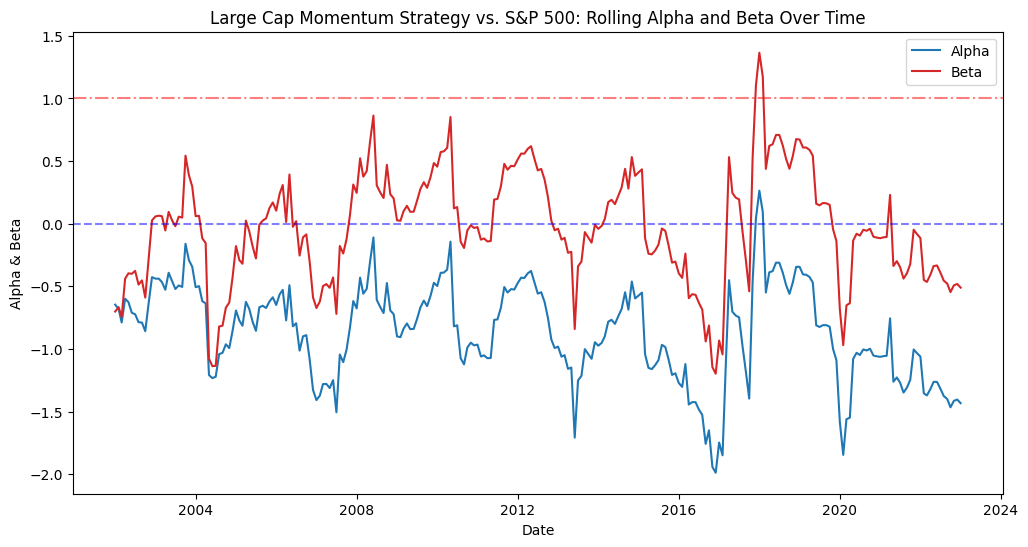

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     2.658
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.104
Time:                        10:12:44   Log-Likelihood:                 406.84
No. Observations:                 253   AIC:                            -809.7
Df Residuals:                     251   BIC:                            -802.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0093      0.003     -3.008      0.0

In [21]:
# Alpha and Beta Largecap Momentum
# Function to get the risk-free rate based on the year
def get_risk_free_rate(year):
    return risk_free_rates.get(year, 0.0)
list_values = Momentum_Strategy_Monthly_Large.values.tolist()
list_benchmark_values = SP500_monthly.values.tolist()
i = pd.date_range(start='2001-01-31', end='2022-12-31', freq='M')
# Create DataFrame for date range
df_dates = pd.DataFrame({'idate': i})
# Create DataFrame for values
df_values = pd.DataFrame({'values': list_values})
# Create DataFrame for benchmark values
df_benchmark_values = pd.DataFrame({'benchmark': list_benchmark_values})
# Combine the DataFrames using an index, ensuring the lengths match
df = pd.concat([df_dates, df_values, df_benchmark_values], axis=1)
df['year'] = df['idate'].dt.year
# Add this line to create a new column with the risk-free rate for each year
df['risk_free_rate'] = df['year'].apply(get_risk_free_rate)
df['month'] = df['idate'].dt.month
df['day'] = df['idate'].dt.day
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.drop(['idate', 'year', 'month', 'day'], axis=1)
df = df.set_index('date')
df = df.reset_index()
df = df.rename(columns={'date': 'idate'})
# Set the index as the 'idate' column
df = df.set_index('idate')
# Calculate the 12-month rolling covariance between the momentum strategy and the benchmark
rolling_cov = df['values'].rolling(window=12).cov(df['benchmark'])
# Calculate the 12-month rolling variance for the benchmark
rolling_var = df['benchmark'].rolling(window=12).var()
# Calculate the 12-month rolling beta
rolling_beta = rolling_cov / rolling_var
# Add the rolling beta as a new column in the DataFrame
df['rolling_beta'] = rolling_beta
# Calculate alpha using the given formula with risk-free rate adjustment
df['alpha'] = ((1 + df['values'] - df['risk_free_rate']).cumprod() - 1) - ((1 + df['benchmark'] - df['risk_free_rate']).cumprod() - 1) * df['rolling_beta']
# Reset the index and rename the 'idate' column back to 'date'
df = df.reset_index().rename(columns={'idate': 'date'})
# Print the updated DataFrame with the new 'alpha' column
print(df)

# Calculate the yearly average for alpha and beta
df['year'] = df['date'].dt.year
yearly_averages = df.groupby('year')[['alpha', 'rolling_beta']].mean().reset_index()

#calculate overall average for alpha and beta
overall_averages = df[['alpha', 'rolling_beta']].mean().reset_index()

# print the overall averages
print('Overall Averages Momentum Strategy Large Cap')
print(overall_averages)


# Print the updated DataFrame with the yearly average alpha and beta columns
print('Yearly Averages Momentum Strategy Large Cap')
print(yearly_averages)

# Convert the yearly_averages DataFrame to LaTeX format
latex_output = yearly_averages.to_latex(index=False)

# Print the LaTeX output
print('large cap momentum strategy yearly averages')
print(latex_output)



caption = 'Rolling Alpha and Beta for Large Cap Momentum Strategy vs. S&P 500'
caption, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Alpha & Beta')
# Plot alpha
ax.plot(df['date'], df['alpha'], color='tab:blue', label='Alpha')
# Plot beta
ax.plot(df['date'], df['rolling_beta'], color='tab:red', label='Beta')
# Add a shared null-line at y=0
# ax.axhline(0, color='blue', linestyle='--', alpha=0.5, label="Alpha Null-Line")
# ax.axhline(1, color='red', linestyle='-.', alpha=0.5, label="Beta Null-Line")
ax.axhline(0, color='blue', linestyle='--', alpha=0.5)
ax.axhline(1, color='red', linestyle='-.', alpha=0.5)
ax.legend()
ax.set_title('Large Cap Momentum Strategy vs. S&P 500: Rolling Alpha and Beta Over Time')
plt.show()
alpha_momentum_large = df['alpha'].mean()
beta_momentum_large = df['rolling_beta'].mean()


import numpy as np
import statsmodels.api as sm

# Remove rows with missing values (e.g., NaN)
df_clean = df.dropna()

# Create the dependent (Y) and independent (X) variables for the regression
Y = df_clean['values'] - df_clean['risk_free_rate']
X = df_clean['benchmark'] - df_clean['risk_free_rate']

# Add a constant to the independent variable (X) to estimate the intercept (alpha) in the regression
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model to see the estimated coefficients (alpha and beta) and their statistical significance
print(model.summary())

In [22]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size=12):
    def get_risk_free_rate(year):
        return risk_free_rates.get(year, 0.0)

    list_values = strategy_values.values.tolist()
    list_benchmark_values = benchmark_values.values.tolist()
    i = pd.date_range(start='2001-01-31', end='2022-12-31', freq='M')

    df_dates = pd.DataFrame({'idate': i})
    df_values = pd.DataFrame({'values': list_values})
    df_benchmark_values = pd.DataFrame({'benchmark': list_benchmark_values})
    df = pd.concat([df_dates, df_values, df_benchmark_values], axis=1)
    df['year'] = df['idate'].dt.year
    df['risk_free_rate'] = df['year'].apply(get_risk_free_rate)
    df['month'] = df['idate'].dt.month
    df['day'] = df['idate'].dt.day
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(['idate', 'year', 'month', 'day'], axis=1)
    df = df.set_index('date')
    df = df.reset_index()
    df = df.rename(columns={'date': 'idate'})
    df = df.set_index('idate')

    rolling_cov = df['values'].rolling(window=window_size).cov(df['benchmark'])
    rolling_var = df['benchmark'].rolling(window=window_size).var()
    rolling_beta = rolling_cov / rolling_var

    df['rolling_beta'] = rolling_beta

    df['alpha'] = ((1 + df['values'] - df['risk_free_rate']).cumprod() - 1) - (
        (1 + df['benchmark'] - df['risk_free_rate']).cumprod() - 1
    ) * df['rolling_beta']

    df = df.reset_index().rename(columns={'idate': 'date'})

    return df


def find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values):
    min_p_value = 1
    optimal_window_size = 0

    for window_size in range(12, 60):
        df = calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size)
        df_clean = df.dropna()

        print("Window size:", window_size)
        print("Dimensions of df_clean:", df_clean.shape)

        Y = df_clean['values'] - df_clean['risk_free_rate']
        X = df_clean['benchmark'] - df_clean['risk_free_rate']
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()

        alpha_p_value = model.pvalues[0]

        if alpha_p_value < min_p_value:
            min_p_value = alpha_p_value
            optimal_window_size = window_size

    return optimal_window_size, min_p_value

# risk_free_rates = { ... }  ## Your existing risk_free_rates dictionary

# Use the stacked values for strategy_values and benchmark_values
strategy_values = Momentum_Strategy_Monthly_Large
benchmark_values = SP500_monthly

optimal_window_size, min_p_value = find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values)
print("Optimal window size:", optimal_window_size)
print("Minimum p-value:", min_p_value)

Window size: 12
Dimensions of df_clean: (253, 6)
Window size: 13
Dimensions of df_clean: (252, 6)
Window size: 14
Dimensions of df_clean: (251, 6)
Window size: 15
Dimensions of df_clean: (250, 6)
Window size: 16
Dimensions of df_clean: (249, 6)
Window size: 17
Dimensions of df_clean: (248, 6)
Window size: 18
Dimensions of df_clean: (247, 6)
Window size: 19
Dimensions of df_clean: (246, 6)
Window size: 20
Dimensions of df_clean: (245, 6)
Window size: 21
Dimensions of df_clean: (244, 6)
Window size: 22
Dimensions of df_clean: (243, 6)
Window size: 23
Dimensions of df_clean: (242, 6)
Window size: 24
Dimensions of df_clean: (241, 6)
Window size: 25
Dimensions of df_clean: (240, 6)
Window size: 26
Dimensions of df_clean: (239, 6)
Window size: 27
Dimensions of df_clean: (238, 6)
Window size: 28
Dimensions of df_clean: (237, 6)
Window size: 29
Dimensions of df_clean: (236, 6)
Window size: 30
Dimensions of df_clean: (235, 6)
Window size: 31
Dimensions of df_clean: (234, 6)
Window size: 32
Dime

Contrarian Large- Alpha beta

          date    values  benchmark  risk_free_rate  rolling_beta     alpha
0   2001-01-31  0.054565   0.034637          0.0335           NaN       NaN
1   2001-02-28 -0.015050  -0.092291          0.0335           NaN       NaN
2   2001-03-31 -0.078299  -0.064205          0.0335           NaN       NaN
3   2001-04-30  0.018972   0.076814          0.0335           NaN       NaN
4   2001-05-31  0.030542   0.005090          0.0335           NaN       NaN
..         ...       ...        ...             ...           ...       ...
259 2022-08-31 -0.018287  -0.042440          0.0217      0.477252 -0.551706
260 2022-09-30 -0.066394  -0.093396          0.0217      0.545907 -0.484779
261 2022-10-31 -0.007498   0.079863          0.0217      0.491578 -0.537436
262 2022-11-30  0.007781   0.053753          0.0217      0.480733 -0.548833
263 2022-12-31 -0.066369  -0.058971          0.0217      0.510092 -0.519508

[264 rows x 6 columns]
Yearly Averages Contrarian Strategy Large Cap
    year     alpha

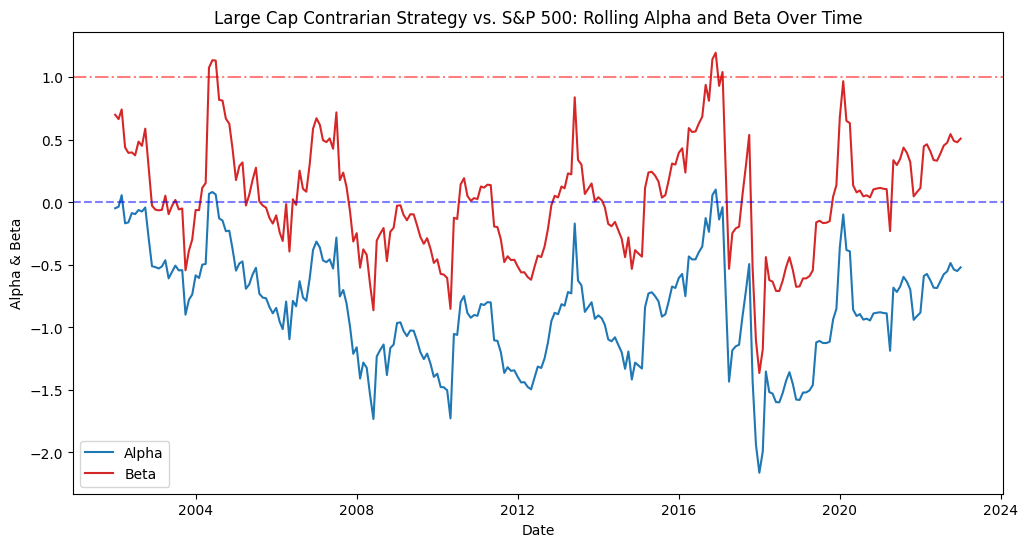

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.034
Date:                Thu, 04 May 2023   Prob (F-statistic):             0.0827
Time:                        10:12:45   Log-Likelihood:                 404.41
No. Observations:                 253   AIC:                            -804.8
Df Residuals:                     251   BIC:                            -797.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0143      0.003     -4.586      0.0

In [23]:
# Alpha and Beta Contrarian Large
# Function to get the risk-free rate based on the year
def get_risk_free_rate(year):
    return risk_free_rates.get(year, 0.0)
list_values = Contrarian_Strategy_Monthly_Large.values.tolist()
list_benchmark_values = SP500_monthly.values.tolist()
i = pd.date_range(start='2001-01-31', end='2022-12-31', freq='M')
# Create DataFrame for date range
df_dates = pd.DataFrame({'idate': i})
# Create DataFrame for values
df_values = pd.DataFrame({'values': list_values})
# Create DataFrame for benchmark values
df_benchmark_values = pd.DataFrame({'benchmark': list_benchmark_values})
# Combine the DataFrames using an index, ensuring the lengths match
df = pd.concat([df_dates, df_values, df_benchmark_values], axis=1)
df['year'] = df['idate'].dt.year
# Add this line to create a new column with the risk-free rate for each year
df['risk_free_rate'] = df['year'].apply(get_risk_free_rate)
df['month'] = df['idate'].dt.month
df['day'] = df['idate'].dt.day
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.drop(['idate', 'year', 'month', 'day'], axis=1)
df = df.set_index('date')
df = df.reset_index()
df = df.rename(columns={'date': 'idate'})
# Set the index as the 'idate' column
df = df.set_index('idate')
# Calculate the 12-month rolling covariance between the momentum strategy and the benchmark
rolling_cov = df['values'].rolling(window=12).cov(df['benchmark'])
# Calculate the 12-month rolling variance for the benchmark
rolling_var = df['benchmark'].rolling(window=12).var()
# Calculate the 12-month rolling beta
rolling_beta = rolling_cov / rolling_var
# Add the rolling beta as a new column in the DataFrame
df['rolling_beta'] = rolling_beta
# Calculate alpha using the given formula with risk-free rate adjustment
df['alpha'] = ((1 + df['values'] - df['risk_free_rate']).cumprod() - 1) - ((1 + df['benchmark'] - df['risk_free_rate']).cumprod() - 1) * df['rolling_beta']
# Reset the index and rename the 'idate' column back to 'date'
df = df.reset_index().rename(columns={'idate': 'date'})
# Print the updated DataFrame with the new 'alpha' column
print(df)

# Calculate the yearly average for alpha and beta
df['year'] = df['date'].dt.year
yearly_averages = df.groupby('year')[['alpha', 'rolling_beta']].mean().reset_index()

# Print the updated DataFrame with the yearly average alpha and beta columns
print('Yearly Averages Contrarian Strategy Large Cap')
print(yearly_averages)

# Convert the yearly_averages DataFrame to LaTeX format
latex_output = yearly_averages.to_latex(index=False)

# Print the LaTeX output
print('Yearly Averages Contrarian Strategy Large Cap')
print(latex_output)

# Plot the rolling alpha and rolling beta
caption = 'Rolling Alpha and Beta for Large Cap contrarian Strategy vs. S&P 500'
caption, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Alpha & Beta')
# Plot alpha
ax.plot(df['date'], df['alpha'], color='tab:blue', label='Alpha')
# Plot beta
ax.plot(df['date'], df['rolling_beta'], color='tab:red', label='Beta')
# Add a shared null-line at y=0
ax.axhline(0, color='blue', linestyle='--', alpha=0.5)
ax.axhline(1, color='red', linestyle='-.', alpha=0.5)
ax.legend()
ax.set_title('Large Cap Contrarian Strategy vs. S&P 500: Rolling Alpha and Beta Over Time')
plt.show()
alpha_contrarian_large = df['alpha'].mean()
beta_contrarian_large = df['rolling_beta'].mean()

#calculate average alpha and beta for small cap

import numpy as np
import statsmodels.api as sm

# Remove rows with missing values (e.g., NaN)
df_clean = df.dropna()

# Create the dependent (Y) and independent (X) variables for the regression
Y = df_clean['values'] - df_clean['risk_free_rate']
X = df_clean['benchmark'] - df_clean['risk_free_rate']

# Add a constant to the independent variable (X) to estimate the intercept (alpha) in the regression
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model to see the estimated coefficients (alpha and beta) and their statistical significance
print(model.summary())

In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size=12):
    def get_risk_free_rate(year):
        return risk_free_rates.get(year, 0.0)

    list_values = strategy_values.values.tolist()
    list_benchmark_values = benchmark_values.values.tolist()
    i = pd.date_range(start='2001-01-31', end='2022-12-31', freq='M')

    df_dates = pd.DataFrame({'idate': i})
    df_values = pd.DataFrame({'values': list_values})
    df_benchmark_values = pd.DataFrame({'benchmark': list_benchmark_values})
    df = pd.concat([df_dates, df_values, df_benchmark_values], axis=1)
    df['year'] = df['idate'].dt.year
    df['risk_free_rate'] = df['year'].apply(get_risk_free_rate)
    df['month'] = df['idate'].dt.month
    df['day'] = df['idate'].dt.day
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(['idate', 'year', 'month', 'day'], axis=1)
    df = df.set_index('date')
    df = df.reset_index()
    df = df.rename(columns={'date': 'idate'})
    df = df.set_index('idate')

    rolling_cov = df['values'].rolling(window=window_size).cov(df['benchmark'])
    rolling_var = df['benchmark'].rolling(window=window_size).var()
    rolling_beta = rolling_cov / rolling_var

    df['rolling_beta'] = rolling_beta

    df['alpha'] = ((1 + df['values'] - df['risk_free_rate']).cumprod() - 1) - (
        (1 + df['benchmark'] - df['risk_free_rate']).cumprod() - 1
    ) * df['rolling_beta']

    df = df.reset_index().rename(columns={'idate': 'date'})

    return df

def find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values):
    min_p_value = 1
    optimal_window_size = 0

    for window_size in range(12, 60):
        df = calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size)
        df_clean = df.dropna()

        print("Window size:", window_size)
        print("Dimensions of df_clean:", df_clean.shape)

        Y = df_clean['values'] - df_clean['risk_free_rate']
        X = df_clean['benchmark'] - df_clean['risk_free_rate']
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()

        alpha_p_value = model.pvalues[0]

        if alpha_p_value < min_p_value:
            min_p_value = alpha_p_value
            optimal_window_size = window_size

    return optimal_window_size, min_p_value

# risk_free_rates = { ... }  ## Your existing risk_free_rates dictionary

# Use the stacked values for strategy_values and benchmark_values
strategy_values = Contrarian_Strategy_Monthly_Large
benchmark_values = SP500_monthly

optimal_window_size, min_p_value = find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values)
print("Optimal window size:", optimal_window_size)
print("Minimum p-value:", min_p_value)

Window size: 12
Dimensions of df_clean: (253, 6)
Window size: 13
Dimensions of df_clean: (252, 6)
Window size: 14
Dimensions of df_clean: (251, 6)
Window size: 15
Dimensions of df_clean: (250, 6)
Window size: 16
Dimensions of df_clean: (249, 6)
Window size: 17
Dimensions of df_clean: (248, 6)
Window size: 18
Dimensions of df_clean: (247, 6)
Window size: 19
Dimensions of df_clean: (246, 6)
Window size: 20
Dimensions of df_clean: (245, 6)
Window size: 21
Dimensions of df_clean: (244, 6)
Window size: 22
Dimensions of df_clean: (243, 6)
Window size: 23
Dimensions of df_clean: (242, 6)
Window size: 24
Dimensions of df_clean: (241, 6)
Window size: 25
Dimensions of df_clean: (240, 6)
Window size: 26
Dimensions of df_clean: (239, 6)
Window size: 27
Dimensions of df_clean: (238, 6)
Window size: 28
Dimensions of df_clean: (237, 6)
Window size: 29
Dimensions of df_clean: (236, 6)
Window size: 30
Dimensions of df_clean: (235, 6)
Window size: 31
Dimensions of df_clean: (234, 6)
Window size: 32
Dime

Momentum small - Alpha beta

          date    values  benchmark  risk_free_rate  rolling_beta     alpha
0   2001-01-31 -0.329320   0.042352          0.0335           NaN       NaN
1   2001-02-28 -0.002765  -0.061689          0.0335           NaN       NaN
2   2001-03-31  0.127023  -0.046515          0.0335           NaN       NaN
3   2001-04-30 -0.254048   0.075642          0.0335           NaN       NaN
4   2001-05-31 -0.139950   0.018387          0.0335           NaN       NaN
..         ...       ...        ...             ...           ...       ...
259 2022-08-31 -0.075282  -0.045147          0.0217      0.779499 -0.346854
260 2022-09-30  0.045961  -0.100534          0.0217      0.619374 -0.468744
261 2022-10-31 -0.006249   0.122654          0.0217      0.322160 -0.728291
262 2022-11-30  0.022064   0.039805          0.0217      0.291415 -0.755046
263 2022-12-31 -0.052910  -0.068881          0.0217      0.426066 -0.635719

[264 rows x 6 columns]
Yearly Averages momentum Strategy Small Cap
    year     alpha  

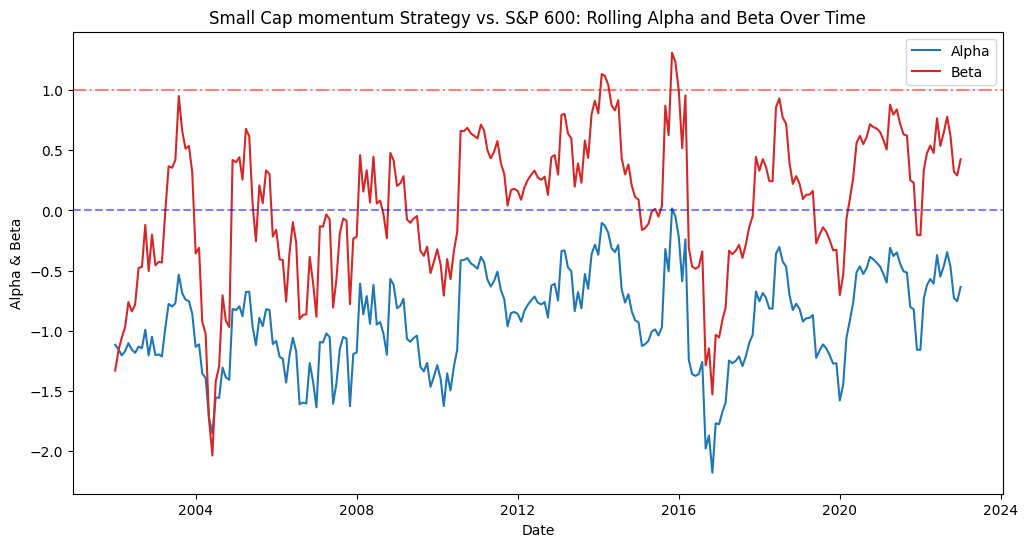

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     2.477
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.117
Time:                        10:12:45   Log-Likelihood:                 222.60
No. Observations:                 253   AIC:                            -441.2
Df Residuals:                     251   BIC:                            -434.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0302      0.006     -4.759      0.0

In [25]:
# Alpha and Beta smallcap momentum
# Function to get the risk-free rate based on the year
def get_risk_free_rate(year):
    return risk_free_rates.get(year, 0.0)
list_values = Momentum_Strategy_Monthly_Small.values.tolist()
list_benchmark_values = SP600_monthly.values.tolist()
i = pd.date_range(start='2001-01-31', end='2022-12-31', freq='M')
# Create DataFrame for date range
df_dates = pd.DataFrame({'idate': i})
# Create DataFrame for values
df_values = pd.DataFrame({'values': list_values})
# Create DataFrame for benchmark values
df_benchmark_values = pd.DataFrame({'benchmark': list_benchmark_values})
# Combine the DataFrames using an index, ensuring the lengths match
df = pd.concat([df_dates, df_values, df_benchmark_values], axis=1)
df['year'] = df['idate'].dt.year
# Add this line to create a new column with the risk-free rate for each year
df['risk_free_rate'] = df['year'].apply(get_risk_free_rate)
df['month'] = df['idate'].dt.month
df['day'] = df['idate'].dt.day
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.drop(['idate', 'year', 'month', 'day'], axis=1)
df = df.set_index('date')
df = df.reset_index()
df = df.rename(columns={'date': 'idate'})
# Set the index as the 'idate' column
df = df.set_index('idate')
# Calculate the 12-month rolling covariance between the momentum strategy and the benchmark
rolling_cov = df['values'].rolling(window=12).cov(df['benchmark'])
# Calculate the 12-month rolling variance for the benchmark
rolling_var = df['benchmark'].rolling(window=12).var()
# Calculate the 12-month rolling beta
rolling_beta = rolling_cov / rolling_var
# Add the rolling beta as a new column in the DataFrame
df['rolling_beta'] = rolling_beta
# Calculate alpha using the given formula with risk-free rate adjustment
df['alpha'] = ((1 + df['values'] - df['risk_free_rate']).cumprod() - 1) - ((1 + df['benchmark'] - df['risk_free_rate']).cumprod() - 1) * df['rolling_beta']
# Reset the index and rename the 'idate' column back to 'date'
df = df.reset_index().rename(columns={'idate': 'date'})
# Print the updated DataFrame with the new 'alpha' column
print(df)

# Calculate the yearly average for alpha and beta
df['year'] = df['date'].dt.year
yearly_averages = df.groupby('year')[['alpha', 'rolling_beta']].mean().reset_index()

# Print the updated DataFrame with the yearly average alpha and beta columns
print('Yearly Averages momentum Strategy Small Cap')
print(yearly_averages)

# Convert the yearly_averages DataFrame to LaTeX format
latex_output = yearly_averages.to_latex(index=False)

# Print the LaTeX output
print('Yearly Averages momentum Strategy Small Cap')
print(latex_output)

# Plot the rolling alpha and rolling beta
caption = 'Rolling Alpha and Beta for Small Cap momentum Strategy vs. S&P 600'
caption, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Alpha & Beta')
# Plot alpha
ax.plot(df['date'], df['alpha'], color='tab:blue', label='Alpha')
# Plot beta
ax.plot(df['date'], df['rolling_beta'], color='tab:red', label='Beta')
# Add a shared null-line at y=0
ax.axhline(0, color='blue', linestyle='--', alpha=0.5)
ax.axhline(1, color='red', linestyle='-.', alpha=0.5)
ax.legend()
ax.set_title('Small Cap momentum Strategy vs. S&P 600: Rolling Alpha and Beta Over Time')
plt.show()
alpha_momentum_small = df['alpha'].mean()
beta_momentum_small = df['rolling_beta'].mean()


import numpy as np
import statsmodels.api as sm

# Remove rows with missing values (e.g., NaN)
df_clean = df.dropna()

# Create the dependent (Y) and independent (X) variables for the regression
Y = df_clean['values'] - df_clean['risk_free_rate']
X = df_clean['benchmark'] - df_clean['risk_free_rate']

# Add a constant to the independent variable (X) to estimate the intercept (alpha) in the regression
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model to see the estimated coefficients (alpha and beta) and their statistical significance
print(model.summary())


In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size=12):
    def get_risk_free_rate(year):
        return risk_free_rates.get(year, 0.0)

    list_values = strategy_values.values.tolist()
    list_benchmark_values = benchmark_values.values.tolist()
    i = pd.date_range(start='2001-01-31', end='2022-12-31', freq='M')

    df_dates = pd.DataFrame({'idate': i})
    df_values = pd.DataFrame({'values': list_values})
    df_benchmark_values = pd.DataFrame({'benchmark': list_benchmark_values})
    df = pd.concat([df_dates, df_values, df_benchmark_values], axis=1)
    df['year'] = df['idate'].dt.year
    df['risk_free_rate'] = df['year'].apply(get_risk_free_rate)
    df['month'] = df['idate'].dt.month
    df['day'] = df['idate'].dt.day
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(['idate', 'year', 'month', 'day'], axis=1)
    df = df.set_index('date')
    df = df.reset_index()
    df = df.rename(columns={'date': 'idate'})
    df = df.set_index('idate')

    rolling_cov = df['values'].rolling(window=window_size).cov(df['benchmark'])
    rolling_var = df['benchmark'].rolling(window=window_size).var()
    rolling_beta = rolling_cov / rolling_var

    df['rolling_beta'] = rolling_beta

    df['alpha'] = ((1 + df['values'] - df['risk_free_rate']).cumprod() - 1) - (
        (1 + df['benchmark'] - df['risk_free_rate']).cumprod() - 1
    ) * df['rolling_beta']

    df = df.reset_index().rename(columns={'idate': 'date'})

    return df


def find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values):
    min_p_value = 1
    optimal_window_size = 0

    for window_size in range(12, 60):
        df = calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size)
        df_clean = df.dropna()

        print("Window size:", window_size)
        print("Dimensions of df_clean:", df_clean.shape)

        Y = df_clean['values'] - df_clean['risk_free_rate']
        X = df_clean['benchmark'] - df_clean['risk_free_rate']
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()

        alpha_p_value = model.pvalues[0]

        if alpha_p_value < min_p_value:
            min_p_value = alpha_p_value
            optimal_window_size = window_size

    return optimal_window_size, min_p_value

# risk_free_rates = { ... }  ## Your existing risk_free_rates dictionary

# Use the stacked values for strategy_values and benchmark_values
strategy_values = Momentum_Strategy_Monthly_Small
benchmark_values = SP600_monthly

optimal_window_size, min_p_value = find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values)
print("Optimal window size:", optimal_window_size)
print("Minimum p-value:", min_p_value)

Window size: 12
Dimensions of df_clean: (253, 6)
Window size: 13
Dimensions of df_clean: (252, 6)
Window size: 14
Dimensions of df_clean: (251, 6)
Window size: 15
Dimensions of df_clean: (250, 6)
Window size: 16
Dimensions of df_clean: (249, 6)
Window size: 17
Dimensions of df_clean: (248, 6)
Window size: 18
Dimensions of df_clean: (247, 6)
Window size: 19
Dimensions of df_clean: (246, 6)
Window size: 20
Dimensions of df_clean: (245, 6)
Window size: 21
Dimensions of df_clean: (244, 6)
Window size: 22
Dimensions of df_clean: (243, 6)
Window size: 23
Dimensions of df_clean: (242, 6)
Window size: 24
Dimensions of df_clean: (241, 6)
Window size: 25
Dimensions of df_clean: (240, 6)
Window size: 26
Dimensions of df_clean: (239, 6)
Window size: 27
Dimensions of df_clean: (238, 6)
Window size: 28
Dimensions of df_clean: (237, 6)
Window size: 29
Dimensions of df_clean: (236, 6)
Window size: 30
Dimensions of df_clean: (235, 6)
Window size: 31
Dimensions of df_clean: (234, 6)
Window size: 32
Dime

Contraian Small - Alpha beta

          date    values  benchmark  risk_free_rate  rolling_beta     alpha
0   2001-01-31  0.329320   0.042352          0.0335           NaN       NaN
1   2001-02-28  0.002765  -0.061689          0.0335           NaN       NaN
2   2001-03-31 -0.127023  -0.046515          0.0335           NaN       NaN
3   2001-04-30  0.254048   0.075642          0.0335           NaN       NaN
4   2001-05-31  0.139950   0.018387          0.0335           NaN       NaN
..         ...       ...        ...             ...           ...       ...
259 2022-08-31  0.075282  -0.045147          0.0217     -0.779499  0.082780
260 2022-09-30 -0.045961  -0.100534          0.0217     -0.619374  0.087219
261 2022-10-31  0.006249   0.122654          0.0217     -0.322160  0.321758
262 2022-11-30 -0.022064   0.039805          0.0217     -0.291415  0.278779
263 2022-12-31  0.052910  -0.068881          0.0217     -0.426066  0.207005

[264 rows x 6 columns]
Yearly Averages Contrarian Strategy Small Cap
    year     alpha

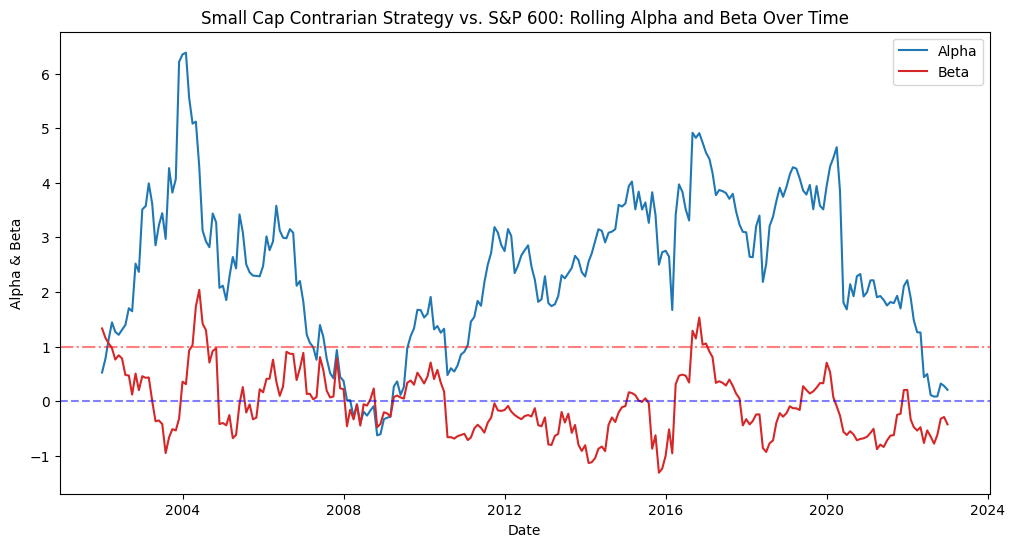

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.05098
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.822
Time:                        10:12:47   Log-Likelihood:                 220.74
No. Observations:                 253   AIC:                            -437.5
Df Residuals:                     251   BIC:                            -430.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0058      0.006      0.901      0.3

In [27]:
# Alpha and Beta Smallcap Contrarian
# Function to get the risk-free rate based on the year
def get_risk_free_rate(year):
    return risk_free_rates.get(year, 0.0)
list_values = Contrarian_Strategy_Monthly_Small.values.tolist()
list_benchmark_values = SP600_monthly.values.tolist()
i = pd.date_range(start='2001-01-31', end='2022-12-31', freq='M')
# Create DataFrame for date range
df_dates = pd.DataFrame({'idate': i})
# Create DataFrame for values
df_values = pd.DataFrame({'values': list_values})
# Create DataFrame for benchmark values
df_benchmark_values = pd.DataFrame({'benchmark': list_benchmark_values})
# Combine the DataFrames using an index, ensuring the lengths match
df = pd.concat([df_dates, df_values, df_benchmark_values], axis=1)
df['year'] = df['idate'].dt.year
# Add this line to create a new column with the risk-free rate for each year
df['risk_free_rate'] = df['year'].apply(get_risk_free_rate)
df['month'] = df['idate'].dt.month
df['day'] = df['idate'].dt.day
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df = df.drop(['idate', 'year', 'month', 'day'], axis=1)
df = df.set_index('date')
df = df.reset_index()
df = df.rename(columns={'date': 'idate'})
# Set the index as the 'idate' column
df = df.set_index('idate')
# Calculate the 12-month rolling covariance between the contrarian strategy and the benchmark
rolling_cov = df['values'].rolling(window=12).cov(df['benchmark'])
# Calculate the 12-month rolling variance for the benchmark
rolling_var = df['benchmark'].rolling(window=12).var()
# Calculate the 12-month rolling beta
rolling_beta = rolling_cov / rolling_var
# Add the rolling beta as a new column in the DataFrame
df['rolling_beta'] = rolling_beta
# Calculate alpha using the given formula with risk-free rate adjustment
df['alpha'] = ((1 + df['values'] - df['risk_free_rate']).cumprod() - 1) - ((1 + df['benchmark'] - df['risk_free_rate']).cumprod() - 1) * df['rolling_beta']
# Reset the index and rename the 'idate' column back to 'date'
df = df.reset_index().rename(columns={'idate': 'date'})
# Print the updated DataFrame with the new 'alpha' column
print(df)

# Calculate the yearly average for alpha and beta
df['year'] = df['date'].dt.year
yearly_averages = df.groupby('year')[['alpha', 'rolling_beta']].mean().reset_index()

# Print the updated DataFrame with the yearly average alpha and beta columns
print('Yearly Averages Contrarian Strategy Small Cap')
print(yearly_averages)

# Convert the yearly_averages DataFrame to LaTeX format
latex_output = yearly_averages.to_latex(index=False)
# Print the LaTeX output
print('Yearly Averages Contrarian Strategy Small Cap')
print(latex_output)


# Plot the rolling alpha and rolling beta
caption = 'Rolling Alpha and Beta for Small Cap Contrarian Strategy vs. S&P 600'
caption, ax = plt.subplots(figsize=(12, 6))
ax.set_xlabel('Date')
ax.set_ylabel('Alpha & Beta')
# Plot alpha
ax.plot(df['date'], df['alpha'], color='tab:blue', label='Alpha')
# Plot beta
ax.plot(df['date'], df['rolling_beta'], color='tab:red', label='Beta')
# Add a shared null-line at y=0
ax.axhline(0, color='blue', linestyle='--', alpha=0.5)
ax.axhline(1, color='red', linestyle='-.', alpha=0.5)
ax.legend()
ax.set_title('Small Cap Contrarian Strategy vs. S&P 600: Rolling Alpha and Beta Over Time')
plt.show()
alpha_contrarian_small = df['alpha'].mean()
beta_contrarian_small = df['rolling_beta'].mean()


import numpy as np
import statsmodels.api as sm

# Remove rows with missing values (e.g., NaN)
df_clean = df.dropna()

# Create the dependent (Y) and independent (X) variables for the regression
Y = df_clean['values'] - df_clean['risk_free_rate']
X = df_clean['benchmark'] - df_clean['risk_free_rate']

# Add a constant to the independent variable (X) to estimate the intercept (alpha) in the regression
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model to see the estimated coefficients (alpha and beta) and their statistical significance
print(model.summary())

Optimal min p-value

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size=12):
    def get_risk_free_rate(year):
        return risk_free_rates.get(year, 0.0)

    list_values = strategy_values.values.tolist()
    list_benchmark_values = benchmark_values.values.tolist()
    i = pd.date_range(start='2001-01-31', end='2022-12-31', freq='M')

    df_dates = pd.DataFrame({'idate': i})
    df_values = pd.DataFrame({'values': list_values})
    df_benchmark_values = pd.DataFrame({'benchmark': list_benchmark_values})
    df = pd.concat([df_dates, df_values, df_benchmark_values], axis=1)
    df['year'] = df['idate'].dt.year
    df['risk_free_rate'] = df['year'].apply(get_risk_free_rate)
    df['month'] = df['idate'].dt.month
    df['day'] = df['idate'].dt.day
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(['idate', 'year', 'month', 'day'], axis=1)
    df = df.set_index('date')
    df = df.reset_index()
    df = df.rename(columns={'date': 'idate'})
    df = df.set_index('idate')

    rolling_cov = df['values'].rolling(window=window_size).cov(df['benchmark'])
    rolling_var = df['benchmark'].rolling(window=window_size).var()
    rolling_beta = rolling_cov / rolling_var

    df['rolling_beta'] = rolling_beta

    df['alpha'] = ((1 + df['values'] - df['risk_free_rate']).cumprod() - 1) - (
        (1 + df['benchmark'] - df['risk_free_rate']).cumprod() - 1
    ) * df['rolling_beta']

    df = df.reset_index().rename(columns={'idate': 'date'})

    return df


def find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values):
    min_p_value = 1
    optimal_window_size = 0

    for window_size in range(12, 60):
        df = calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size)
        df_clean = df.dropna()

        print("Window size:", window_size)
        print("Dimensions of df_clean:", df_clean.shape)

        Y = df_clean['values'] - df_clean['risk_free_rate']
        X = df_clean['benchmark'] - df_clean['risk_free_rate']
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()

        alpha_p_value = model.pvalues[0]

        if alpha_p_value < min_p_value:
            min_p_value = alpha_p_value
            optimal_window_size = window_size

    return optimal_window_size, min_p_value

# risk_free_rates = { ... }  ## Your existing risk_free_rates dictionary

# Use the stacked values for strategy_values and benchmark_values
strategy_values = Contrarian_Strategy_Monthly_Small
benchmark_values = SP600_monthly

optimal_window_size, min_p_value = find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values)
print("Optimal window size:", optimal_window_size)
print("Minimum p-value:", min_p_value)

Window size: 12
Dimensions of df_clean: (253, 6)
Window size: 13
Dimensions of df_clean: (252, 6)
Window size: 14
Dimensions of df_clean: (251, 6)
Window size: 15
Dimensions of df_clean: (250, 6)
Window size: 16
Dimensions of df_clean: (249, 6)
Window size: 17
Dimensions of df_clean: (248, 6)
Window size: 18
Dimensions of df_clean: (247, 6)
Window size: 19
Dimensions of df_clean: (246, 6)
Window size: 20
Dimensions of df_clean: (245, 6)
Window size: 21
Dimensions of df_clean: (244, 6)
Window size: 22
Dimensions of df_clean: (243, 6)
Window size: 23
Dimensions of df_clean: (242, 6)
Window size: 24
Dimensions of df_clean: (241, 6)
Window size: 25
Dimensions of df_clean: (240, 6)
Window size: 26
Dimensions of df_clean: (239, 6)
Window size: 27
Dimensions of df_clean: (238, 6)
Window size: 28
Dimensions of df_clean: (237, 6)
Window size: 29
Dimensions of df_clean: (236, 6)
Window size: 30
Dimensions of df_clean: (235, 6)
Window size: 31
Dimensions of df_clean: (234, 6)
Window size: 32
Dime

Optimal rolling . Alpha with t-value higher than x

In [29]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size=12):
    def get_risk_free_rate(year):
        return risk_free_rates.get(year, 0.0)

    list_values = strategy_values.values.tolist()
    list_benchmark_values = benchmark_values.values.tolist()
    i = pd.date_range(start='2001-01-31', end='2022-12-31', freq='M')

    df_dates = pd.DataFrame({'idate': i})
    df_values = pd.DataFrame({'values': list_values})
    df_benchmark_values = pd.DataFrame({'benchmark': list_benchmark_values})
    df = pd.concat([df_dates, df_values, df_benchmark_values], axis=1)
    df['year'] = df['idate'].dt.year
    df['risk_free_rate'] = df['year'].apply(get_risk_free_rate)
    df['month'] = df['idate'].dt.month
    df['day'] = df['idate'].dt.day
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    df = df.drop(['idate', 'year', 'month', 'day'], axis=1)
    df = df.set_index('date')
    df = df.reset_index()
    df = df.rename(columns={'date': 'idate'})
    df = df.set_index('idate')

    rolling_cov = df['values'].rolling(window=window_size).cov(df['benchmark'])
    rolling_var = df['benchmark'].rolling(window=window_size).var()
    rolling_beta = rolling_cov / rolling_var

    df['rolling_beta'] = rolling_beta

    df['alpha'] = ((1 + df['values'] - df['risk_free_rate']).cumprod() - 1) - (
        (1 + df['benchmark'] - df['risk_free_rate']).cumprod() - 1
    ) * df['rolling_beta']

    df = df.reset_index().rename(columns={'idate': 'date'})

    return df


def find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values):
    max_alpha = float('-inf')
    optimal_window_size = 0
    t_value_threshold = 0.1

    for window_size in range(12, 60):
        df = calculate_alpha_and_beta(risk_free_rates, strategy_values, benchmark_values, window_size)
        df_clean = df.dropna()

        print("Window size:", window_size)
        print("Dimensions of df_clean:", df_clean.shape)

        Y = df_clean['values'] - df_clean['risk_free_rate']
        X = df_clean['benchmark'] - df_clean['risk_free_rate']
        X = sm.add_constant(X)
        model = sm.OLS(Y, X).fit()

        alpha_t_value = model.tvalues[0]
        avg_alpha = df_clean['alpha'].mean()

        if alpha_t_value > t_value_threshold and avg_alpha > max_alpha:
            max_alpha = avg_alpha
            optimal_window_size = window_size

    return optimal_window_size, max_alpha

# risk_free_rates = { ... }  ## Your existing risk_free_rates dictionary

# Use the stacked values for strategy_values and benchmark_values
strategy_values = Contrarian_Strategy_Monthly_Small
benchmark_values = SP600_monthly

optimal_window_size, max_alpha = find_optimal_window_size(risk_free_rates, strategy_values, benchmark_values)
print("Optimal window size:", optimal_window_size)
print("Maximum average alpha:", max_alpha)


Window size: 12
Dimensions of df_clean: (253, 6)
Window size: 13
Dimensions of df_clean: (252, 6)
Window size: 14
Dimensions of df_clean: (251, 6)
Window size: 15
Dimensions of df_clean: (250, 6)
Window size: 16
Dimensions of df_clean: (249, 6)
Window size: 17
Dimensions of df_clean: (248, 6)
Window size: 18
Dimensions of df_clean: (247, 6)
Window size: 19
Dimensions of df_clean: (246, 6)
Window size: 20
Dimensions of df_clean: (245, 6)
Window size: 21
Dimensions of df_clean: (244, 6)
Window size: 22
Dimensions of df_clean: (243, 6)
Window size: 23
Dimensions of df_clean: (242, 6)
Window size: 24
Dimensions of df_clean: (241, 6)
Window size: 25
Dimensions of df_clean: (240, 6)
Window size: 26
Dimensions of df_clean: (239, 6)
Window size: 27
Dimensions of df_clean: (238, 6)
Window size: 28
Dimensions of df_clean: (237, 6)
Window size: 29
Dimensions of df_clean: (236, 6)
Window size: 30
Dimensions of df_clean: (235, 6)
Window size: 31
Dimensions of df_clean: (234, 6)
Window size: 32
Dime

Print

In [30]:
# To Print OUTS
print('LARGE CAP PRINT OUTS')
print(f'Momentum overperformance Largecap mean 1 month: {Momentum_overperformance_large_mean_1:.3f}')
print(f'Momentum overperformance Largecap mean 3 month: {Momentum_overperformance_large_mean_3:.3f}')
print(f'Momentum overperformance Largecap mean 6 month: {Momentum_overperformance_large_mean_6:.3f}')
print(f'Momentum overperformance Largecap mean 9 month: {Momentum_overperformance_large_mean_9:.3f}')
print(f'Momentum overperformance Largecap mean 12 month: {Momentum_overperformance_large_mean_12:.3f}')

print(f'Contrarian overperformance Largecap mean 1 month: {Contrarian_overperformance_large_mean_1:.3f}')
print(f'Contrarian overperformance Largecap mean 3 month: {Contrarian_overperformance_large_mean_3:.3f}')
print(f'Contrarian overperformance Largecap mean 6 month: {Contrarian_overperformance_large_mean_6:.3f}')
print(f'Contrarian overperformance Largecap mean 9 month: {Contrarian_overperformance_large_mean_9:.3f}')
print(f'Contrarian overperformance Largecap mean 12 month: {Contrarian_overperformance_large_mean_12:.3f}')
print('SMALL CAP PRINT OUTS')
print(f'Momentum overperformance Smallcap mean 1 month: {Momentum_overperformance_small_mean_1:.3f}')
print(f'Momentum overperformance Smallcap mean 3 month: {Momentum_overperformance_small_mean_3:.3f}')
print(f'Momentum overperformance Smallcap mean 6 month: {Momentum_overperformance_small_mean_6:.3f}')
print(f'Momentum overperformance Smallcap mean 9 month: {Momentum_overperformance_small_mean_9:.3f}')
print(f'Momentum overperformance Smallcap mean 12 month: {Momentum_overperformance_small_mean_12:.3f}')

print(f'Contrarian overperformance Smallcap mean 1 month:  {Contrarian_overperformance_small_mean_1:.3f}')
print(f'Contrarian overperformance Smallcap mean 3 month:  {Contrarian_overperformance_small_mean_3:.3f}')
print(f'Contrarian overperformance Smallcap mean 6 month:  {Contrarian_overperformance_small_mean_6:.3f}')
print(f'Contrarian overperformance Smallcap mean 9 month:  {Contrarian_overperformance_small_mean_9:.3f}')
print(f'Contrarian overperformance Smallcap mean 12 month: {Contrarian_overperformance_small_mean_12:.3f}')

print('Alpha mean Momentum Largecap', alpha_momentum_large)
print('Alpha mean Contrarian Largecap', alpha_contrarian_large)
print('Beta mean Momentum largecap', beta_momentum_small)
print('Beta mean Contrarian largecap', beta_contrarian_small)
print('Alpha mean Momentum Smallcap', alpha_momentum_small)
print('Alpha mean Contrarian Smallcap', alpha_contrarian_small)
print('beta mean Momentum Smallcap', beta_momentum_small)
print('beta mean Contrarian Smallcap', beta_contrarian_small)






Large_VS_Small_Momentum = Momentum_Strategy_Cum_Large - Momentum_Strategy_Cum_Small
Large_VS_Small_Contrarian = Contrarian_Strategy_Cum_Large - Contrarian_Strategy_Cum_Small 
print('Momentum Strategy Large cap vs Small cap')
print(Large_VS_Small_Momentum)
print('Contrarian Strategy Large Cap vs Small Cap')
print(Large_VS_Small_Contrarian)


Large_VS_Small_Momentum_1_month_mean = Large_VS_Small_Momentum['1 month'].mean()
Large_VS_Small_Momentum_3_month_mean = Large_VS_Small_Momentum['3 month'].mean()
Large_VS_Small_Momentum_6_month_mean = Large_VS_Small_Momentum['6 month'].mean()
Large_VS_Small_Momentum_9_month_mean = Large_VS_Small_Momentum['9 month'].mean()
Large_VS_Small_Momentum_12_month_mean = Large_VS_Small_Momentum['12 month'].mean()

Large_VS_Small_Contrarian_1_month_mean = Large_VS_Small_Contrarian['1 month'].mean()
Large_VS_Small_Contrarian_3_month_mean = Large_VS_Small_Contrarian['3 month'].mean()
Large_VS_Small_Contrarian_6_month_mean = Large_VS_Small_Contrarian['6 month'].mean()
Large_VS_Small_Contrarian_9_month_mean = Large_VS_Small_Contrarian['9 month'].mean()
Large_VS_Small_Contrarian_12_month_mean = Large_VS_Small_Contrarian['12 month'].mean()

# print the means with only 2 decimals
print('Large VS Small Momentum 1 month mean: ', round(Large_VS_Small_Momentum_1_month_mean, 2))
print('Large VS Small Momentum 3 month mean: ', round(Large_VS_Small_Momentum_3_month_mean, 2))
print('Large VS Small Momentum 6 month mean: ', round(Large_VS_Small_Momentum_6_month_mean, 2))
print('Large VS Small Momentum 9 month mean: ', round(Large_VS_Small_Momentum_9_month_mean, 2))
print('Large VS Small Momentum 12 month mean: ', round(Large_VS_Small_Momentum_12_month_mean, 2))

print('Large VS Small Contrarian 1 month mean: ', round(Large_VS_Small_Contrarian_1_month_mean, 2))
print('Large VS Small Contrarian 3 month mean: ', round(Large_VS_Small_Contrarian_3_month_mean, 2))
print('Large VS Small Contrarian 6 month mean: ', round(Large_VS_Small_Contrarian_6_month_mean, 2))
print('Large VS Small Contrarian 9 month mean: ', round(Large_VS_Small_Contrarian_9_month_mean, 2))
print('Large VS Small Contrarian 12 month mean: ', round(Large_VS_Small_Contrarian_12_month_mean, 2))

LARGE CAP PRINT OUTS
Momentum overperformance Largecap mean 1 month: 0.000
Momentum overperformance Largecap mean 3 month: -0.003
Momentum overperformance Largecap mean 6 month: -0.013
Momentum overperformance Largecap mean 9 month: 0.005
Momentum overperformance Largecap mean 12 month: -0.024
Contrarian overperformance Largecap mean 1 month: 0.007
Contrarian overperformance Largecap mean 3 month: 0.005
Contrarian overperformance Largecap mean 6 month: -0.016
Contrarian overperformance Largecap mean 9 month: -0.042
Contrarian overperformance Largecap mean 12 month: -0.109
SMALL CAP PRINT OUTS
Momentum overperformance Smallcap mean 1 month: -0.065
Momentum overperformance Smallcap mean 3 month: -0.112
Momentum overperformance Smallcap mean 6 month: -0.181
Momentum overperformance Smallcap mean 9 month: -0.389
Momentum overperformance Smallcap mean 12 month: -0.742
Contrarian overperformance Smallcap mean 1 month:  0.068
Contrarian overperformance Smallcap mean 3 month:  0.089
Contrarian